# Анализ оттока клиентов банка

Материалы по проекту:

- [Презентация](https://disk.yandex.ru/d/FFmnELVH94ZIQg)
- [Дашборд](https://public.tableau.com/app/profile/natalia7606/viz/banks_16936532350870/Dashboard1)

Ссылки на презентацию и дашборд также приведены в последних разделах проекта 


## Описание проекта

**Заказчик исследования:** отдел маркетинга регионального банка "Метанпром". Подразделения банка расположены в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Объект исследования:**  датасет с данными о клиентах банка "Метанпром".

**Цели исследования:** повышение качества работы по удержанию клиентов и снижение процента оттока клиентов. 

**Задачи, которые должны быть решены в ходе исследования:**
- Загрузка данных из предоставленного источника 
- Предобработка данных:
    - Проверка наименований столбцов датасета и при необходимости их переименование 
    - Анализ пропусков в столбцах датасета, оценка возможности их заполнения 
    - Проверка корректности типов данных, их изменение при необходимости 
    - Проверка дубликатов в датасете (полных и неявных) и при необходимости их удаление 
    - Проверка на корреткность и аномалии значений количественных и качетсвенных параметров датасета 
- Проведение исследовательского анализа данныз (EDA):
    - Предварительная подготовка данных для исследования, добавление новых столбцов датасета при необходимости 
    - Исследование количественных параметров - базовые статистические параметры, гистограмма, проверка аномалий и выбросов в значениях 
    - Исследование качественных параметров - частота значений параметров 
    - При необходимости удаление выбросов и аномалий в данных 
    - При необходимости преобразование категориальных столбцов в бинарные
    - Построение предварительной корреляционной матрицы для параметров датасета 
    - Исследование распределения значений признаков по уровню оттока клиентов 
- Выделение сегментов клиентов, наиболее склонных к оттоку:
    - определение уровня оттока по всему датасету 
    - определение интервалов значений и отдельных значений параметров клиентов, которые показывают наибольший отток
    - разбиение клиентов на сегменты с использованием результатов EDA и выделенных интерфалов значений параметров 
    - доплонительная классификация клиентов с ипользованием кластеризации методом K-means:
        - выделение признаков клиента в отдельный стандартизованные датасет
        - построение дендрограммы на стандартизованной матрице признаков и принятие решения о количестве кластеров, 
        - разбиение датасета с признаками на кластер
        - изучение характеристик получившихся кластеров - средние/медианные значения признаков, распределения значений признаков в разбивке по кластерам, оценка процента оттока по каждому кластеру    
    - на основании ранее полученных данных определение не менее 3-х наиболее показательных сегментов клиентов, наиболее склонных к оттоку
    - приоритезация выделенных сегментов клиентов 
    - формулирование выводов по выделенным сегментам
- Проверка статистических гипотез:
    - На основании проведенного анализа определить гипотезы, подлежащие проверке. Возможные предварительные варианты (окончательный перечень гипотез будет определен в ходе проекта):
        - Гипотеза 1. Проверить зависимоть между уровнем денежного состояния клиента (уровнем заработной платы и балансом на счете) и вероятностью ухода 
        - Гипотеза 2. Проверить влияние баллов кредитного скоринга на вероятность ухода 
        - Гипотеза 3. Определить склонны ли к уходу неактивные клиенты 
        - Гипотеза 4. Определить склонны ли к уходу клиенты, у которых мало банковских продуктов
        - Гипотеза 5. Проверить зависимость между наличием кредтной карты и вероятностью ухода клиента 
        - Гипотеза 6. Определить склонны ли к уходу клиенты определенных возрастных групп 
    - Выбор типа гипотезы - формулирование двусторонней или односторонней гипотезы 
    - Выделение тестовых выборок 
    - Проверка гипотезы в "ручном" режиме, используя данные EDA и результаты новых сравнений между выборками
    - Проверка гипотезы с использованием статистических тестов с обоснованием выбора уровня статистической значимости и используемого статистического теста 
    - формулирование выводов по проведенным проверкам гипотез 
- Разработка рекомендаций по повышению удержания клиентов с учетом выявленных отточных клиентов и результатов проверки гипотез 

## Импорт библиотек для проекта и загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd

# библиотеки для построения графиков
#!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# библиотека для проверки гипотез
from scipy import stats as st

# библиотеки для работы с математическими операциями
import math
import numpy as np

# класс для стандартизации признаков  
from sklearn.preprocessing import StandardScaler
# классы для иерархической кластеризации 
from scipy.cluster.hierarchy import dendrogram, linkage
# класс для кластеризации kmeans
from sklearn.cluster import KMeans

# уберем ограничения при выводе таблиц на экран, чтобы было удобней оценивать выборки по аномалиям
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 1000)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
# Сброс ограничений на количество элементов в списке
pd.set_option('display.max_seq_items', None)

### Загрузка данных

In [2]:
try:
    df_bank = pd.read_csv('file.csv')
    print('Загрузка данных из локального диска')
except FileNotFoundError:
    df_bank = pd.read_csv('...file.csv')
    print('Загрузка данных из сервера ЯП')

Загрузка данных из локального диска


## Общее описание данных 

Получим общие данные о датасете 

In [3]:
print('Размер датасета:', df_bank.shape)
df_bank.info()

Размер датасета: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
# сохраним размер исходного датасета 
df_raw_shape = df_bank.shape

Выделим процент оттока по всем клиентам банка, чтобы ориентироваться на него при дальнейшем анализе 

In [5]:
df_churn_common_percent = df_bank['churn'].mean()
print('Процент оттока по всем клиентам банка:', 
     format(df_churn_common_percent, '.1%'))

Процент оттока по всем клиентам банка: 18.2%


При дальнейшем анализе и сегментации клиентов будем выделять сегменты клиентов, которые превышают средний показатель оттока по всему банку

In [6]:
df_bank.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Датасет содержит 10 тыс значений. При первичном анализе видим, что среди 12 колонок датасета в 2 есть отсутствующие значения (balance, age). Некоторые колонки требуют переименования (USERID, EST_SALARY). Также возможно потребуется изменение типов данных для age и score

Датасет содержит следующие данные:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `equity` — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty / last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Предобработка данных

### Переименование столбцов

Переменуем столбцы 'USERID' и 'EST_SALARY' согласно правилам "змеиного" стиля 

In [7]:
df_bank.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace = True)
df_bank.head(1)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1


### Анализ пропусков

Проверим процент пропущенных значений от общего объема датасета

In [8]:
# функция по выводу графика с процентами наличия пропусков 

def check_pass_value_percent_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', 
                  figsize = (20,5), 
                  legend = False, 
                  fontsize = 16, 
                  color = '#DDA0DD', xlabel='Название столбца', ylabel='Процент пропусков')
            .set_title('Процент пропусков от общего числа значений \n', fontsize = 21, color = '#DA70D6') 
            
        );    
    except:
        print('пропусков не осталось!')

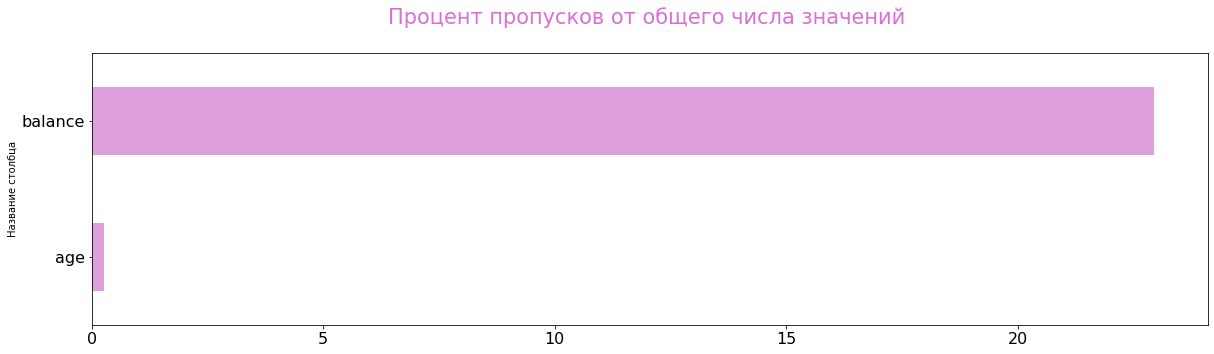

In [9]:
check_pass_value_percent_barh(df_bank)

Датасет содержит пропуски в 2-х столбцах - `age` и `balance`. 

Достоверно заполнить пропуски в столбце `age` мы не можем, и, поскольку число таких пропущенных записей составляет очень маленький процент, то можем их удалить. 

Пропуски в `balance` заполнить также достоверно невозможно. Проверим, есть ли в датасете клиенты с балансом, равным 0. Если таких клиентов нет, то можем заполнить пропущенные значения цифрой `0`. Если клиенты с нулевым балансом есть, то оставим пропуски как есть. Если на следующих этапах анализа потребуется, то заменим их заглушками или удалим строчки датасета. 

Перед удалением строк с пропусками в age посмотрим, в каких данных они содержались: 

In [10]:
df_bank.loc[df_bank['age'].isna()].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


Клиенты с пропусками в возрасте преимущественно содержат заполненные значения без явных отклонений, почти все клиенты с кредитной картой. Вероятно пропуски возникли по причине технического сбоя, потому что нельзя стать клиентом банка не предъявив паспорт и не указав дату рождения   

In [11]:
print('Размер датасета до удаления:', df_bank.shape)
# удаление строк с пропусками в `age`
df_bank.dropna(subset=['age'], inplace=True)
# проверка размерности датасета после удаления строк 
print('Размер датасета после удаления:', df_bank.shape)

Размер датасета до удаления: (10000, 12)
Размер датасета после удаления: (9974, 12)


Удалили 36 строчек из 10 000. Теперь проверим, можно ли заполнить пропуски в `balance`  значением `0`

In [12]:
# проверяем есть ли клиенты с балансом 0 
print('Количество клиентов с нулевым балансом:',len(df_bank.loc[df_bank['balance'] == 0]))

Количество клиентов с нулевым балансом: 2


В датасете есть 2 записи клиентов с балансом 0, значит пропуск обозначает не нулевой баланс, а физическое отсутствие данных. Оставим как есть. 

Также поскольку данные с пропущенными балансом составляют большой объем от исходного датасета, то посмотрим на них отдельно при проведении дальнейшего анализа 

### Изменение типов данных

Столбцы `score` и `age` имеют тип `float64`. Проверим их значения - если там нет чисел с плавающей точкой, то изменим тип на `int64`

In [13]:
df_bank.score.unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [14]:
df_bank.age.unique()

array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., 83., 82., 81.,
       84., 79., 86.])

Все значения - целочисленные, поэтому выполним изменение типа данных


In [15]:
df_bank.score = df_bank.score.astype('int64')

In [16]:
df_bank.age = df_bank.age.astype('int64')

In [17]:
#проверка преобразования типов данных
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


Остальные столбцы содержат корректные типы данных. Столбцы с бинарными значениями 0/1 оставим в целоцисленном типе, чтобы упростить вычисления 

### Проверка значений в столбцах

In [18]:
df_bank.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0


Проверим на аномальность значения в категориальных столбцах, в столбцах с бинарными значениями

In [19]:
# проверим уникальные значения для столбцов с бинарными признаками и категориальным признаком 
for i in ['city', 'gender', 'credit_card', 'last_activity', 'churn']:
    print(i, 'unique:', df_bank[i].unique())

city unique: ['Рыбинск' 'Ярославль' 'Ростов']
gender unique: ['Ж' 'М']
credit_card unique: [0 1]
last_activity unique: [1 0]
churn unique: [1 0]


В категориальных и бинарных столбцах аномальных значений и неявных дубликатов нет 

Также проверим значения в столбцах `equity` и `products`:

In [20]:
for i in ['equity', 'products']:
    print(i, 'unique:', df_bank[i].unique())

equity unique: [1 5 0 4 3 2 6 7 8 9]
products unique: [2 3 1 4 5 0]


Аномальных значений и неявных дубликатов в столбце `equity` нет. В столбце `products` видим, что есть значение `0`. Оно является ошибочным, потому что в соответствии с информацией от Заказчика, у клиента должен быть как минимум один банковский продукт. Посмотрим на число таких записей и примем решение об их удалении  

In [21]:
print('Число клиентов с 0 продуктов:', df_bank.loc[df_bank['products'] == 0].shape[0])

Число клиентов с 0 продуктов: 1


У нас один такой клиент, можем его удалить 

In [22]:
print('Размер датасета до удаления:', df_bank.shape)
df_bank = df_bank.loc[df_bank['products'] != 0]
print('Размер датасета после удаления:', df_bank.shape)

Размер датасета до удаления: (9974, 12)
Размер датасета после удаления: (9973, 12)


### Проверка на полные дубликаты и дубликаты по `user_id`

Выполним проверку на полные дубликаты и на дубликаты в столбце с идентификатором клиента 

In [23]:
# проверка на полные дубликаты 
df_bank.duplicated().sum()

0

In [24]:
df_bank['user_id'].duplicated().sum()

50

У нас есть 50 клиентов с дублирующимися user_id. Их не так много, поэтому посмотрим на эти записи 

In [25]:
pd.concat(i for k, i in df_bank.groupby("user_id") if len(i) > 1)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0


Видим, что в дублирующих записях практически все признаки отличаются, включая пол и возраст. Достоверно определить, какая из записей валидная, невозможно. Поэтому, учитывая, что таких записей всего `50 * 2 = 100`, то можем их удалить. 

In [26]:
print('Размер датасета до удаления:', df_bank.shape)
# удалим все записи с дубликатами в 'user_id'
df_bank.drop_duplicates(subset=['user_id'], keep=False, inplace=True)
# проверим размер датасета после удаления 
print('Размер датасета после удаления:', df_bank.shape)

Размер датасета до удаления: (9973, 12)
Размер датасета после удаления: (9873, 12)


## Исследовательский анализ данных (EDA)

### Выделение категорий данных 

Перед исследованием определим категории данных. На основании значений, содержащихся в данных, можно сделать следующие разбиение: 
- числовые: 
    - `score` — баллы кредитного скоринга,
    - `age` — возраст
    - `balance` — баланс на счёте
    - `estimated_salary` — заработная плата клиента
- категориальные упорядоченные (ординальные):
    - `equity` — количество баллов собственности
    - `products` — количество продуктов, которыми пользуется клиент
        Не смотря на то, что эти два столбца содержат числовые значения, они имеют ограниченный упорядоченный набор значений (от 0 до 9 для баллов собственности и от 0 до 5 для количества продуктов). Поэтому мы может отнести их к категории ординальных. 
- категориальные неупорядоченные (номинальные):
    - `userid` — идентификатор пользователя
    - `city` — город
    - `gender` — пол
    - `credit_card` — есть ли кредитная карта
    - `last_activity` — активный клиент
    - `churn` — ушёл или нет

### Предварительная подготовка

Значения в столбцах `balance` и `est_salary` содержатся в вероятно в рублях. Для удобства восприятия визуализаций создадим столбцы, хранящие эти же значения в тысячах рублей. Также будем использовать математическое округление, потому что в данном случае важен основной порядок чисел, а не их точность до копейки. Исходные столбцы также оставим в датасете - они помогут выявить аномально большие и маленькие значения.

In [27]:
df_bank['balance_ths'] = df_bank['balance'] / 1000
df_bank['est_salary_ths'] = df_bank['est_salary'] / 1000
# проверка 
df_bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_ths,est_salary_ths
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59.21482,75.71914
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850.59433,86.62177
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,NaN,107.68334
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1524.74626,174.42353
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0.17400,67.35316


Также, поскольку категориальные столбцы `city` и `gender` содержат ограниченное количество значений, то добавим столбцы, которые будут содеражать их бинарное соответствие. Это не сильно увеличит датасет, но поможет вычислениям в исследовании. Столбцы с исходными значениями также сохраним 

In [28]:
# сохраним значения столбцов для преобрахования в отдельные столбцы 
df_bank[['gender_', 'city_']] = df_bank[['gender', 'city']]

# выполним one hot кодирование для новых столбцов
df_bank = pd.get_dummies(df_bank, columns=['gender_', 'city_'], drop_first=False)

# проверка 
df_bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_ths,est_salary_ths,gender__Ж,gender__М,city__Ростов,city__Рыбинск,city__Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59.21482,75.71914,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,850.59433,86.62177,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,NaN,107.68334,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1524.74626,174.42353,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0.17400,67.35316,0,1,0,0,1


Разобьем основные столбцы по спискам в соответствии с категориями для удобства будущих визуализаций 

In [29]:
# список для количественных параметров 
quant_param_list = ['score', 'age', 
                    'balance', 
                    'est_salary']

# список для категориальных упорядоченных параметров 
cat_ord_param_list = ['equity','products']


# список для категориальных неупорядоченных параметров 
cat_param_list = ['city', 'gender', 'credit_card', 'last_activity']

### Матрица корреляции

Построим матрицу корреляции признаков и целевой переменной с признаком оттока. В перечне признаков рассмотрим только числовые, бинарные (в том числе преобразованные) и ординарные категориальные признаки

In [30]:
df_bank[['churn', 'score', 'age', 'equity', 'balance', 
         'products', 'credit_card', 'last_activity', 
         'est_salary', 'gender__Ж', 'gender__М',
         'city__Ростов', 'city__Рыбинск', 'city__Ярославль']].corr().head(1)

,churn,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender__Ж,gender__М,city__Ростов,city__Рыбинск,city__Ярославль
churn,1.0,0.102737,-0.047264,0.266346,0.08379,0.297409,-0.128948,0.166087,-0.001261,-0.141697,0.141697,0.008615,-0.033649,0.024112


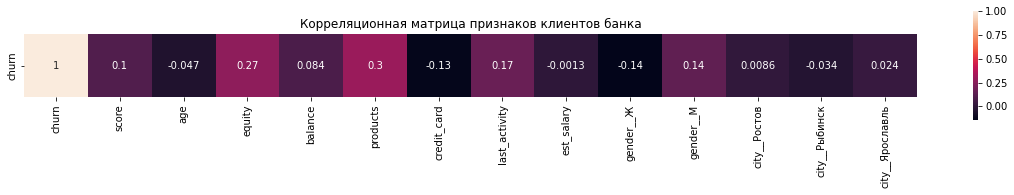

In [31]:
plt.figure(figsize = (20,2))

# нарисуем тепловую карту
sns.heatmap(df_bank[['churn', 'score', 'age', 'equity', 'balance', 
         'products', 'credit_card', 'last_activity', 
         'est_salary', 'gender__Ж', 'gender__М',
         'city__Ростов', 'city__Рыбинск', 'city__Ярославль']].corr().head(1), 
           square = True, 
           annot = True)

plt.title('Корреляционная матрица признаков клиентов банка')

plt.show()

Поскольку мы исследуем отток клиентов, то в первую очередь нас интересует корреляция с признаком `churn`. По матрице корреляции ни один из признаков по всем своим значениям не показал высокую корреляцию с фактом оттока. Самые большие значения индекса корреляции для оттока у признаков "количество баллов собственности" (0.27) и "количество продуктов" (0.3) 

Поэтому при сегментации клиентов будем искать комбинации значений параметров, влияющих на отток 

### Исследование количественных признаков 

#### Базовые статистические значения 

Выведем первичные статистические данные о среднем значении, медиане и стандартном отклонении количественных признаков

In [32]:
# создадим временный словарь для стат значений параметров 
temp_stat = {}

# запишем в словарь значение для каждого параметра
for i in quant_param_list+['balance_ths','est_salary_ths']:
    #print(df_bank[i].describe().loc[['mean','50%','std','min','max']], '\n')
    temp_stat[i] = pd.Series(df_bank[i].describe().loc[['mean','50%','std','min','max']])

# переведем словарь в датасет 
temp_df_stat = pd.DataFrame(temp_stat)
display(temp_df_stat)

,score,age,balance,est_salary,balance_ths,est_salary_ths
mean,848.576015,42.746885,8.247445e+05,1.477063e+05,824.744488,147.706320
50%,852.000000,40.000000,5.237956e+05,1.196105e+05,523.795600,119.610530
std,65.450160,12.182368,1.982779e+06,1.391207e+05,1982.779425,139.120716
min,642.000000,18.000000,0.000000e+00,2.546300e+03,0.000000,2.546300
max,1000.000000,86.000000,1.191136e+08,1.395064e+06,119113.552010,1395.064450


Базовые статистические параметры по всему датасету показали: 
- кол-во баллов скоринга имеет небольшое различие между средним и медианой, значит в этом параметре практически нет выбросов и аномальных значений 
- возраст клиентов от 18 до 86 лет, что также соответсвует норме, потому что совпадает с разрешенным возрастом для заключения договора с банком. Также видим небольшое отличие медианы от среднего, значит параметр практически не содержит аномальных выбросов 
- есть клиенты с нулевым балансом, а стандартное отклонение по балансу составляет  1,8 млн. Это очень большой разброс, поэтому надо проверить столбец на выбросы 
- минимальная высчитанная зарплата около 2,5 тыс, это значение не выглядит аномальным, потому что это может быть самозанятый клиент с нестабильным доходом. Однако видим отклонение по зарплате, превышающее медианное значение. Значит есть вероятность выбросов и стоит их проверить 

#### Гистограмма распределения значений 

Построим гистограмму распределения коичественных признаков, чтобы выявить наличие аномальных выбросов 

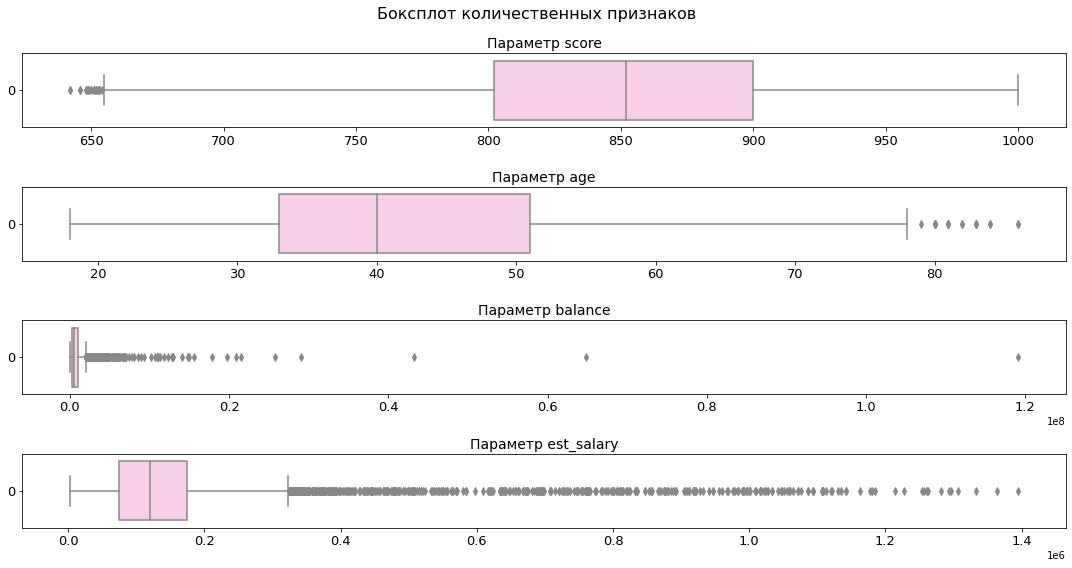

In [33]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/1)

plt.figure(figsize=(15, 2 * count_plt_row)).\
suptitle('Боксплот количественных признаков', fontsize=16)

# перебираем элементы списка и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.boxplot(data=df_bank[i], orient='h', palette=['#FFC7EA'])
    
    plt.title('Параметр {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Видим, что в очках сокорринга и возрасте есть небольшое количество значений, которые выходят за пределы межквартильного размаха, но они расположены на достаточно близком расстоянии, поэтому считать их аномальными будет неправильным. Учитывая, что ширина межквартильного размаха и границ усов достаточно большие, то оставим эти значения в датасете, потому что они не должны искажать результат исследования 

Что касается баланса на счете, то как и показал предварительный анализ, у нас есть несколько точечных выбросов, которые расположены далеко от правой границы усов. Сами "усы" узкие и после правого уса есть участок плотного хвоста примеро до 10 млн, значит основная масса значений стабильна и расположена примерно на этом значении. Поэтому точечные выбросы могут искать нам картину, стоит их удалить. 

Для принятия решения о количестве удаляемых записей посчитаем число строчек с аномальными значениями 

Посмотрим детальней разброс значений на промежутке от 5 до 20 млн 

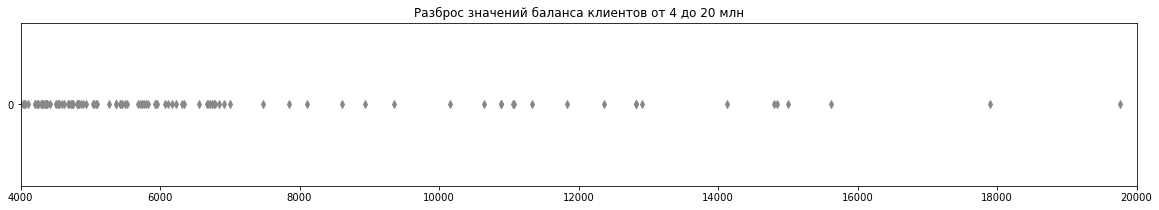

In [34]:
plt.figure(figsize =(20, 3))
sns.boxplot(data=df_bank['balance_ths'], orient='h', palette=['#FFC7EA'])
plt.xlim(4000,20000)
plt.title('Разброс значений баланса клиентов от 4 до 20 млн')
plt.show()

In [35]:
print('Число клиентов с балансом, больше 7 млн:', df_bank.loc[df_bank['balance_ths'] >= 7000].shape[0])
print('Процент оттока, среди клиентов с балансом больше 7 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 7000, 'churn'].mean(), '.0%'))

print('Число клиентов с балансом, больше 6,6 млн:', df_bank.loc[df_bank['balance_ths'] >= 6600].shape[0])
print('Процент оттока, среди клиентов с балансом больше 6,6 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 6600, 'churn'].mean(), '.0%'))

# 
print('Число клиентов с балансом, больше 6,4 млн:', df_bank.loc[df_bank['balance_ths'] >= 6400].shape[0])
print('Процент оттока, среди клиентов с балансом больше 6,4 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 6400, 'churn'].mean(), '.0%'))

# 
print('Число клиентов с балансом, больше 6,3 млн:', df_bank.loc[df_bank['balance_ths'] >= 6300].shape[0])
print('Процент оттока, среди клиентов с балансом больше 6,3 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 6300, 'churn'].mean(), '.0%'))

# 
print('Число клиентов с балансом, больше 6,2 млн:', df_bank.loc[df_bank['balance_ths'] >= 6200].shape[0])
print('Процент оттока, среди клиентов с балансом больше 6,2 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 6200, 'churn'].mean(), '.0%'))

# 
print('Число клиентов с балансом, больше 6 млн:', df_bank.loc[df_bank['balance_ths'] >= 6000].shape[0])
print('Процент оттока, среди клиентов с балансом больше 6 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 6000, 'churn'].mean(), '.0%'))

print('Число клиентов с балансом, больше 4 млн:', df_bank.loc[df_bank['balance_ths'] >= 4000].shape[0])
print('Процент оттока, среди клиентов с балансом больше 4 млн:', 
     format(df_bank.loc[df_bank['balance_ths'] >= 4000, 'churn'].mean(), '.0%'))

Число клиентов с балансом, больше 7 млн: 33
Процент оттока, среди клиентов с балансом больше 7 млн: 39%
Число клиентов с балансом, больше 6,6 млн: 41
Процент оттока, среди клиентов с балансом больше 6,6 млн: 39%
Число клиентов с балансом, больше 6,4 млн: 42
Процент оттока, среди клиентов с балансом больше 6,4 млн: 40%
Число клиентов с балансом, больше 6,3 млн: 44
Процент оттока, среди клиентов с балансом больше 6,3 млн: 41%
Число клиентов с балансом, больше 6,2 млн: 45
Процент оттока, среди клиентов с балансом больше 6,2 млн: 40%
Число клиентов с балансом, больше 6 млн: 48
Процент оттока, среди клиентов с балансом больше 6 млн: 38%
Число клиентов с балансом, больше 4 млн: 109
Процент оттока, среди клиентов с балансом больше 4 млн: 33%


Эксперименты показали, что в датасете мало клиентов с балансом более 4 млн. Однако срез клиентов с балансом от 6,3 млн имеет очень большой процент ухода - 41%. Таких клиентов всего 44 человека. Удалим их из основного датасета, чтобы не было искажений при выделении сегментов, и сохраним в отдельный датасет. При дальнейшей сегментации изучим их отдельно, потому что возможно поймем причину, по которой в банке так мало клиентов с большим балансом и почему они уходят 

In [36]:
df_top_balance_client = df_bank.loc[df_bank['balance_ths'] >= 6300]
#df_top_balance_client.shape

In [37]:
print('Размер датасета до удаления:', df_bank.shape)
df_bank = df_bank.loc[((df_bank['balance_ths'] < 6300) | (df_bank['balance_ths'].isna()))]
print('Размер датасета после удаления:', df_bank.shape)

Размер датасета до удаления: (9873, 19)
Размер датасета после удаления: (9829, 19)


In [38]:
format(df_bank.loc[df_bank['balance_ths'].isna(), 'churn'].mean(), '.2%')

'0.53%'

У клиентов с пропусками в балансе практически отсутствует отток - он составляет всего пол процента. Поэтому при сегментации клиентов записи с отсутствующим балансом не будут представлять для нас интереса 

In [39]:
df_bank.loc[~df_bank['balance_ths'].isna()].shape[0]

7570

In [40]:
format(df_bank.loc[~df_bank['balance_ths'].isna(), 'churn'].mean(), '.2%')

'22.96%'

У параметра высчитанной зарплаты нет таких аномлаьно далеких выбросов, как в балансе. На гисторграмме есть небольшое "прорежение" записей после 600 тыс и далее после 1,2 млн. Посмотрим сколько таких клиентов осталось и какой у них отток 

In [41]:
print('Число клиентов с зарплатой, больше 600 тыс:', df_bank.loc[df_bank['est_salary_ths'] >= 600].shape[0])
print('Процент оттока, среди клиентов с зарплатой больше 600 тыс:', 
     format(df_bank.loc[df_bank['est_salary_ths'] >= 600, 'churn'].mean(), '.0%'))
print('Число клиентов с зарплатой, больше 1200 тыс:', df_bank.loc[df_bank['est_salary_ths'] >= 1200].shape[0])
print('Процент оттока, среди клиентов с зарплатой больше 1200 тыс:', 
     format(df_bank.loc[df_bank['est_salary_ths'] >= 1200, 'churn'].mean(), '.0%'))

Число клиентов с зарплатой, больше 600 тыс: 195
Процент оттока, среди клиентов с зарплатой больше 600 тыс: 9%
Число клиентов с зарплатой, больше 1200 тыс: 10
Процент оттока, среди клиентов с зарплатой больше 1200 тыс: 0%


195 клиентов с доходом больше 600 тыс при исходном размере датасете в 10 000 - это почти 2% клиентов. Такой хвост нельзя считать аномальным поэтому оставим их в датасете. Также клиентов с доходом 1,2 млн всего 10 человек, но среди них нет оттока. Поэтому они не представляют интереса для отдельного исследования и также останутся в общем датасете

#### Гистограмма распределения значений количественных признаков с учетом факта оттока

Построим гистограмму распределения значений количественных признаков с учетом факта оттока. Для построения будем использовать список названий количественных признаков, сохраненный в списке `quant_param_list`. 

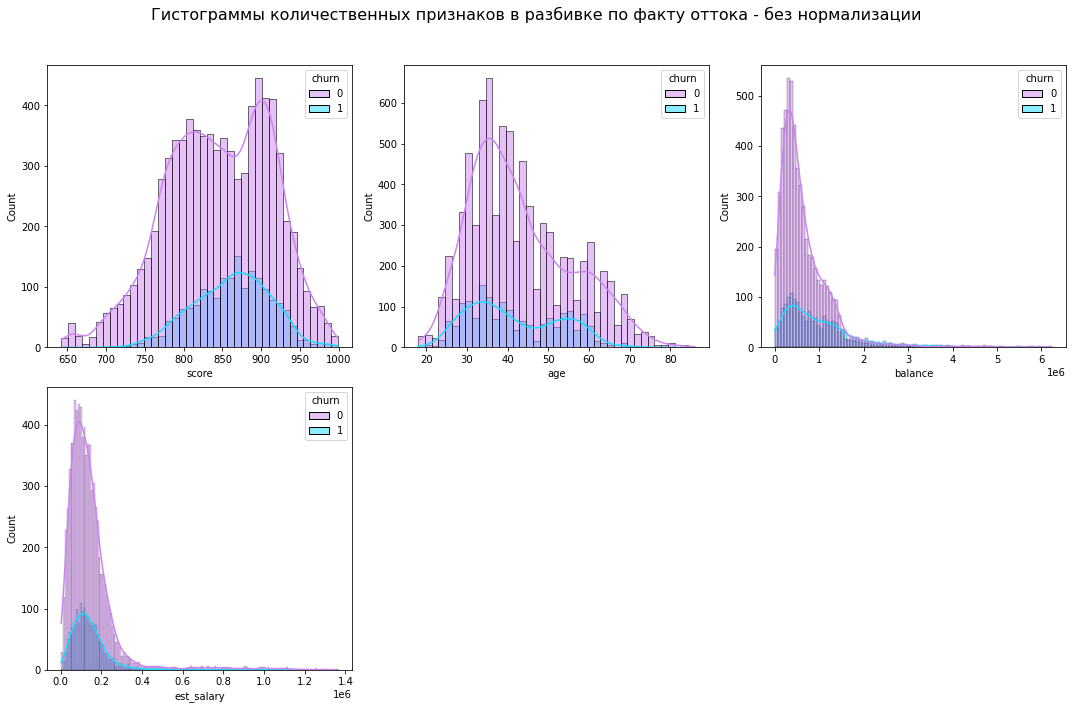

In [42]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/3)

plt.figure(figsize=(15, 5 * count_plt_row))\
.suptitle('Гистограммы количественных признаков в разбивке по факту оттока - без нормализации', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.histplot(data=df_bank, kde=True, x=i, hue='churn', palette=['#cd84f1', 
                                                                         '#18dcff'])
    

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

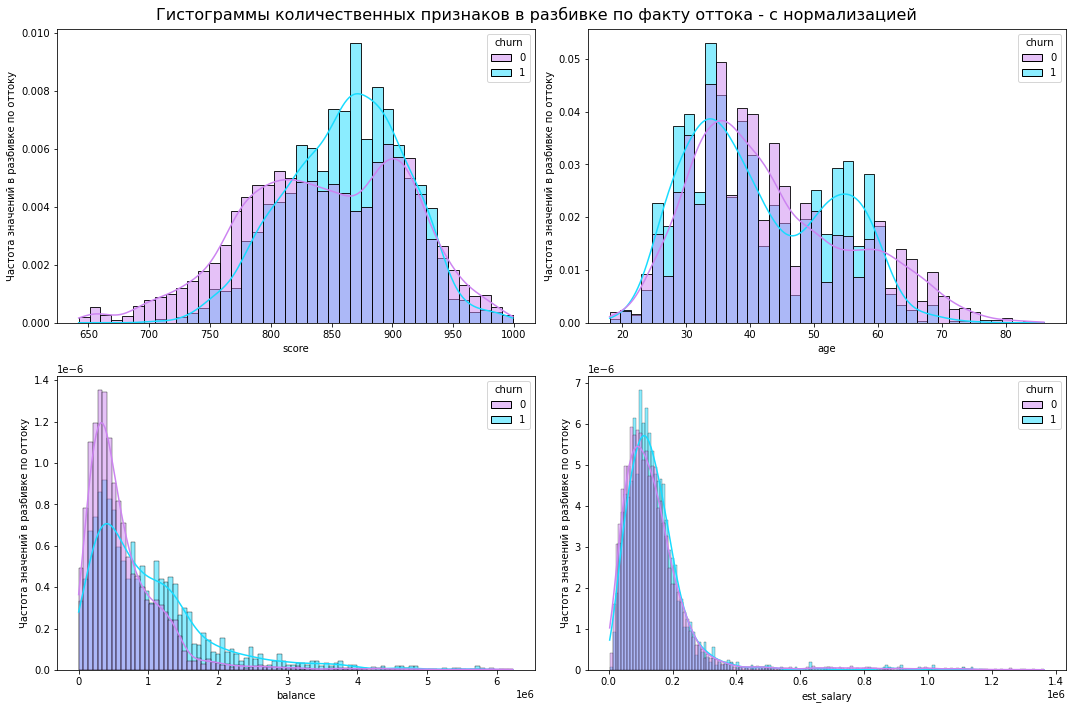

In [43]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/2)

plt.figure(figsize=(15, 5 * count_plt_row))\
.suptitle('Гистограммы количественных признаков в разбивке по факту оттока - с нормализацией', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 2, counter+1)
    
    ax1 = sns.histplot(data=df_bank, kde=True, x=i, hue='churn', 
                       common_norm = False, stat ='density', palette=['#cd84f1', 
                                                                         '#18dcff'])
    plt.ylabel('Частота значений в разбивке по оттоку')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.95) 
plt.show()

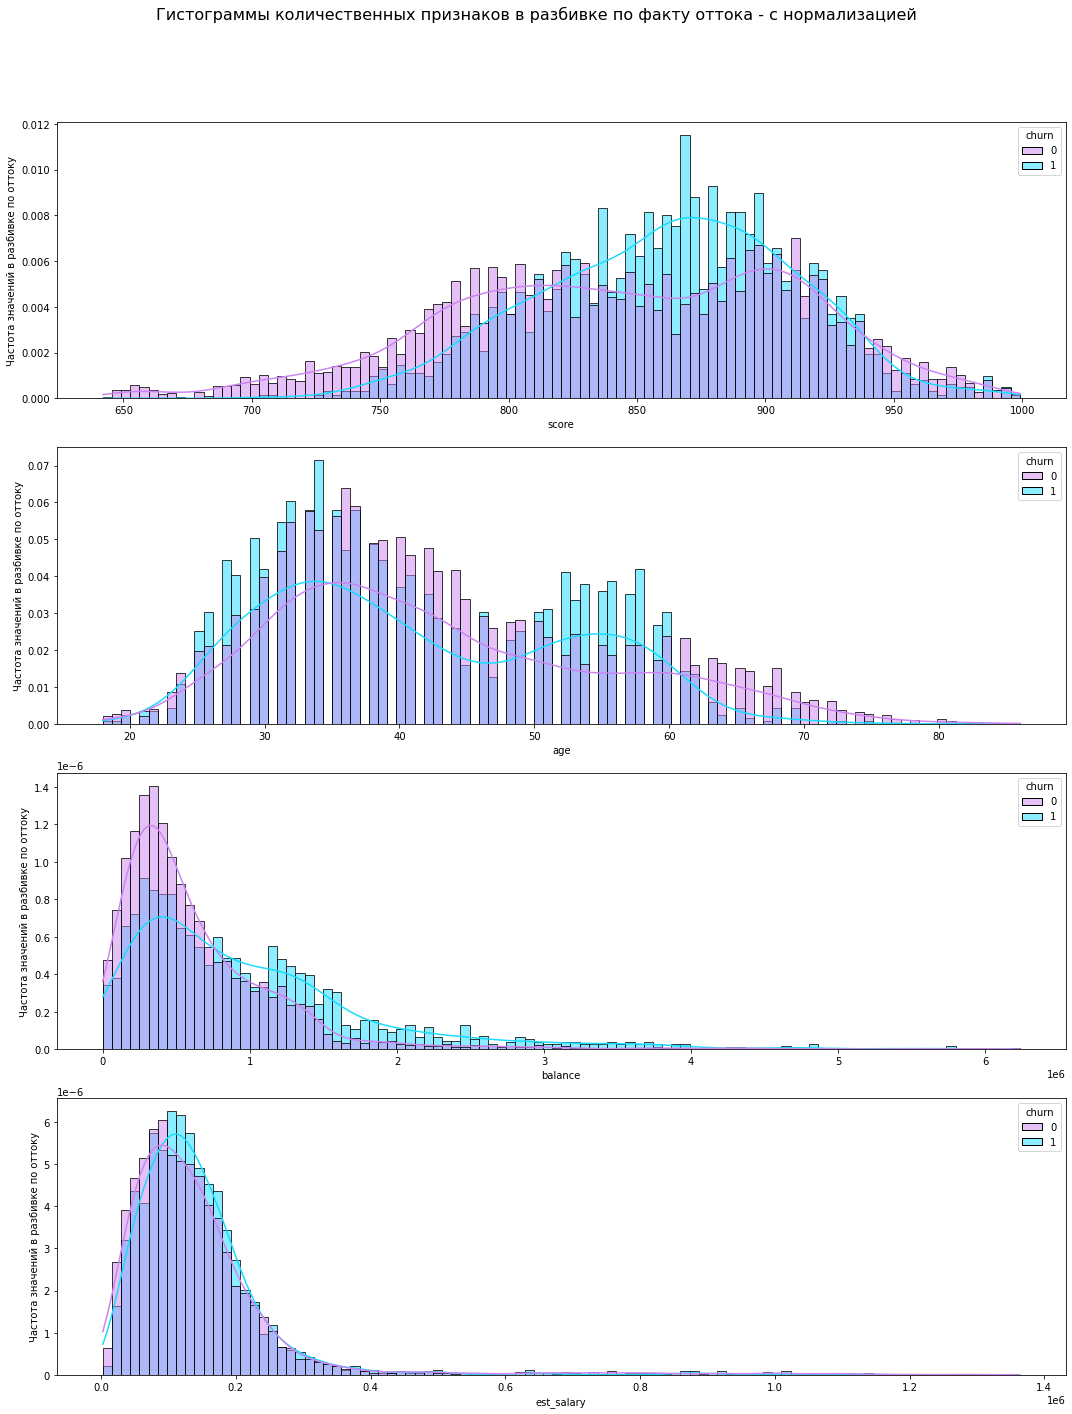

In [44]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика 
count_plt_row = math.ceil(len(quant_param_list)/1)

plt.figure(figsize=(15, 5 * count_plt_row))\
.suptitle('Гистограммы количественных признаков в разбивке по факту оттока - с нормализацией', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.histplot(data=df_bank, x=i, hue='churn', kde=True,
                       common_norm=False, stat='density', palette=['#cd84f1','#18dcff'], bins=100)
    plt.ylabel('Частота значений в разбивке по оттоку')
    

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Предварительно по гистограмма количественных признаков в разбивке по оттоку видно: 
- для скоринговых баллов уровень оттока увеличивается примерно на отместке с 830 до 930 баллов 
- для возраста есть несколько интервалов около от 20 лет до 35 и от 50 до 60 - надо проверить на диаграмме с плотностью вероятности оттока для конкретного возраста 
- для баланса видим, что у клиентов без оттока на самых частых значениях уровень оттока будет небольшим - гистограмма оттока относительно гистограммы без оттока увеличивается на крайних правых значениях - для баланса после 700 тыс 
- для зарплаты в основном уровень оттока находится на одном уровене на протяжении всей гистограммы, есть небольшое увеличение оттока от 100 до 200 тыс 

In [45]:
# датасет для вывода гистограммы 
#df_bank.groupby('age').agg({'churn':'mean'}).reset_index().head()

In [46]:
#df_churn_common_percent

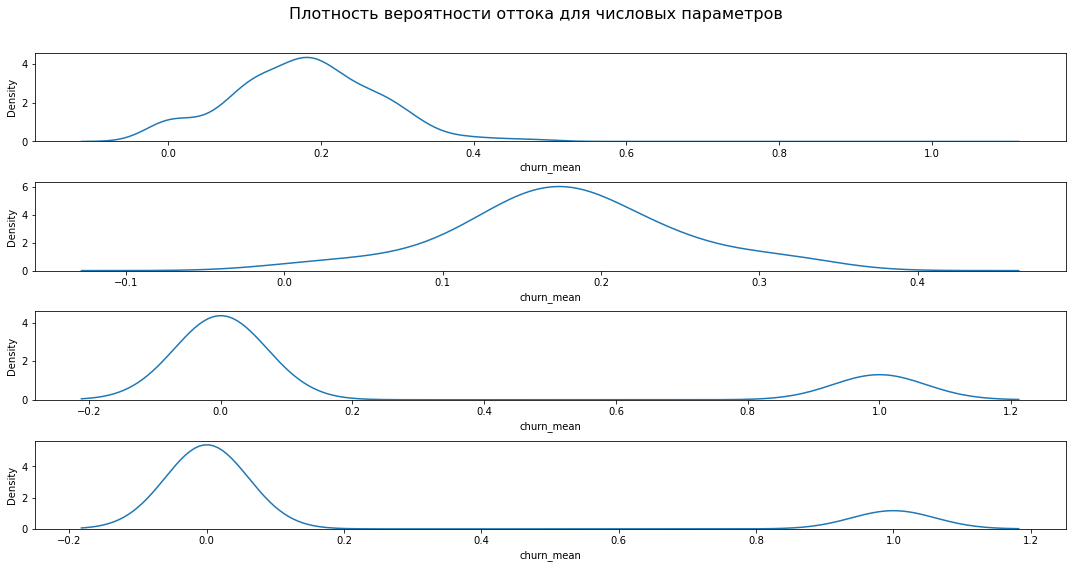

In [47]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/1)

plt.figure(figsize=(15, 2 * count_plt_row)).suptitle('Плотность вероятности оттока для числовых параметров', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    #ax1 = sns.kdeplot(data=df_bank.groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(), 
                      #x=i,y='churn')
    ax1 = sns.kdeplot(data=df_bank.groupby(i).agg(churn_mean=('churn','mean'), n=(i, 'count')), 
                      x='churn_mean', weights='n')
    
    #plt.axhline(y=df_churn_common_percent, color='red', linestyle='--')
    
    
plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

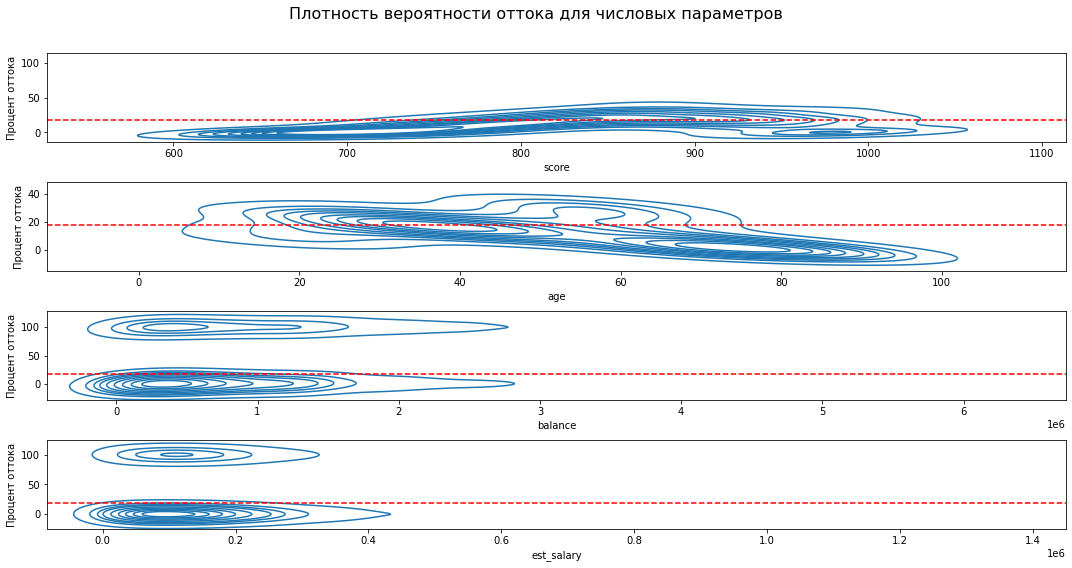

In [48]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/1)

plt.figure(figsize=(15, 2 * count_plt_row)).suptitle('Плотность вероятности оттока для числовых параметров', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.kdeplot(data=df_bank.groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(), 
                      x=i,y='churn')

    
    plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    plt.ylabel('Процент оттока')
    
    
plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

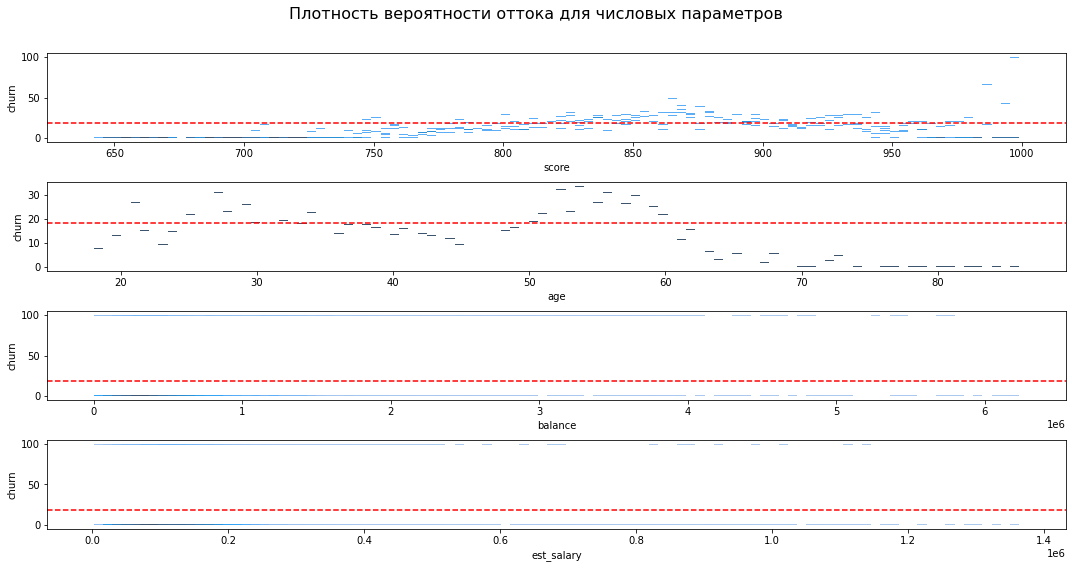

In [49]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list)/1)

plt.figure(figsize=(15, 2 * count_plt_row)).suptitle('Плотность вероятности оттока для числовых параметров', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.histplot(data=df_bank.groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(), 
             x=i,y='churn',bins=100,
            common_norm=True)
    
    plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    
    
plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

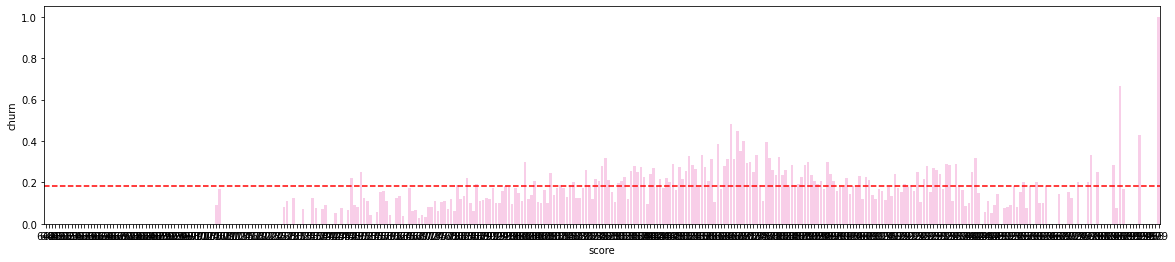

In [50]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_bank.groupby('score').agg({'churn':'mean'}).reset_index(),
           y='churn',
           x='score', palette=['#FFC7EA']) 
plt.axhline(y=df_churn_common_percent, color='red', linestyle='--')

plt.show()

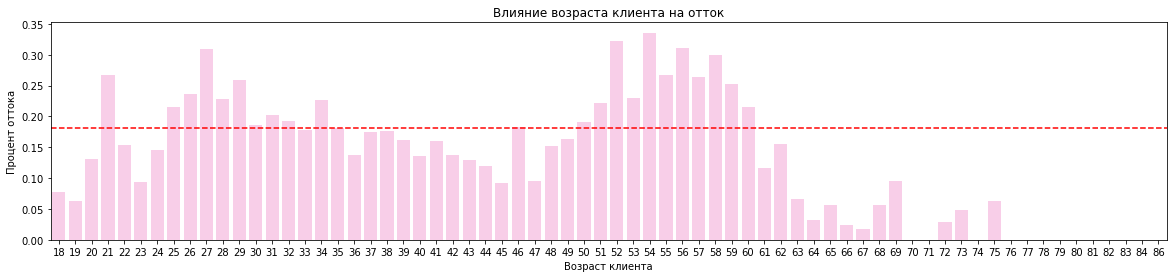

In [51]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_bank.groupby('age').agg({'churn':'mean'}).reset_index(),
           y='churn',
           x='age', palette=['#FFC7EA']) 
plt.axhline(y=df_churn_common_percent, color='red', linestyle='--')

plt.title('Влияние возраста клиента на отток')
plt.xlabel('Возраст клиента')
plt.ylabel('Процент оттока')
plt.show()

По гистограммам распределения значений в разрезе оттока и барплотам можно выделить следующие интервалы с большим процентом оттока:
- очки скоринга примерно с 830 до 920 
- возраст с 25 примерно до 35 и с 50 до 60 

### Исследование качественных признаков 

Построим боскплот с количеством значений качественных признаков (упорядоченных и нет)

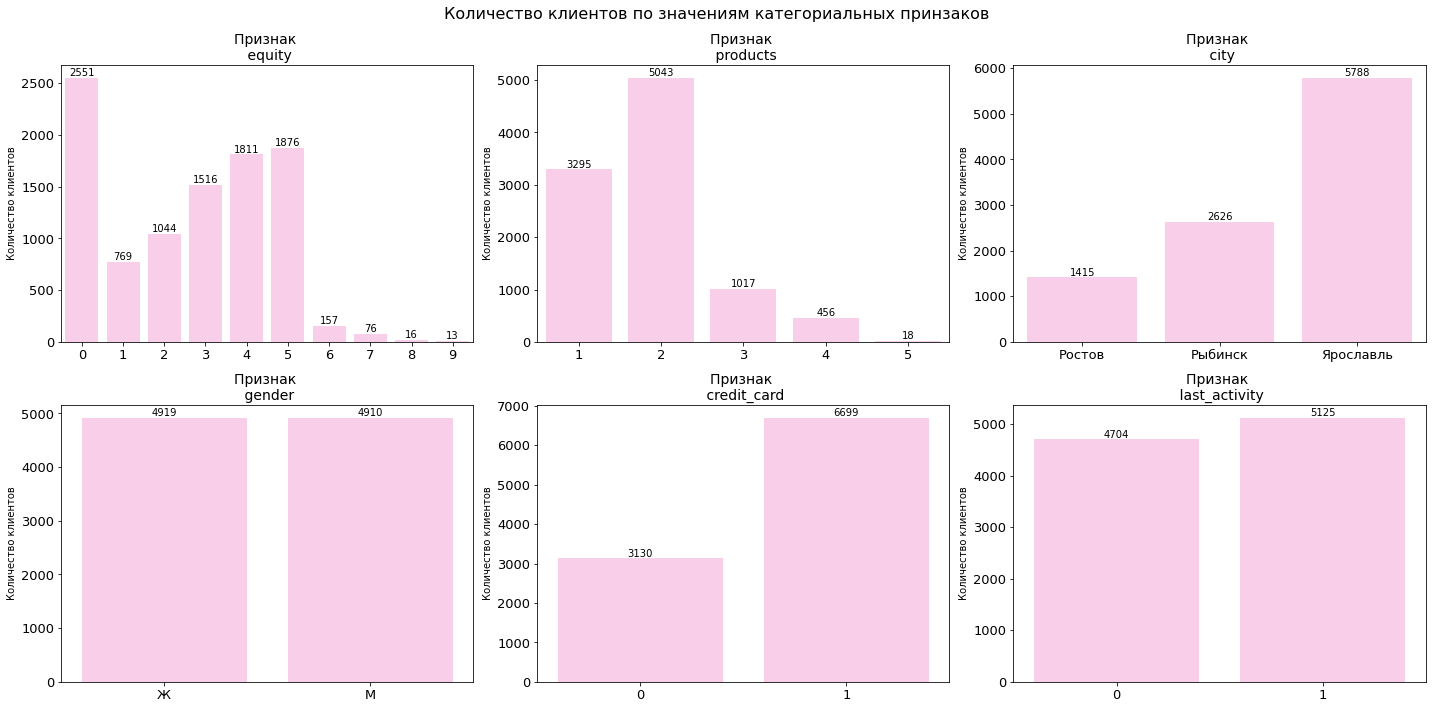

In [52]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row)).suptitle('Количество клиентов по значениям категориальных принзаков', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.groupby(i).agg({'user_id':'count'}).reset_index(),
           y='user_id',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(None)
    plt.ylabel('Количество клиентов')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Видим, что в датасете: 
- преобладают клиенты с 0 оценкой недвижимости, далее 4 и 5, 1-3 и больше 6 
- больше всего клиентов с 2 продуктами, далее с 1, клиентов с 3 и 4 продуктами значительно меньше, а с 5 всего 18 человек 
- больше всего клиентов в Ярославле, на втором месте Рыбинск 
- гендеры распределились практически поровну 
- клиентов с кредитной картой в 2 раза больше, чем без нее 
- различия в признаке активности минимальны 

Подсчитаем процент оттока по каждому значению категориальных признаков 

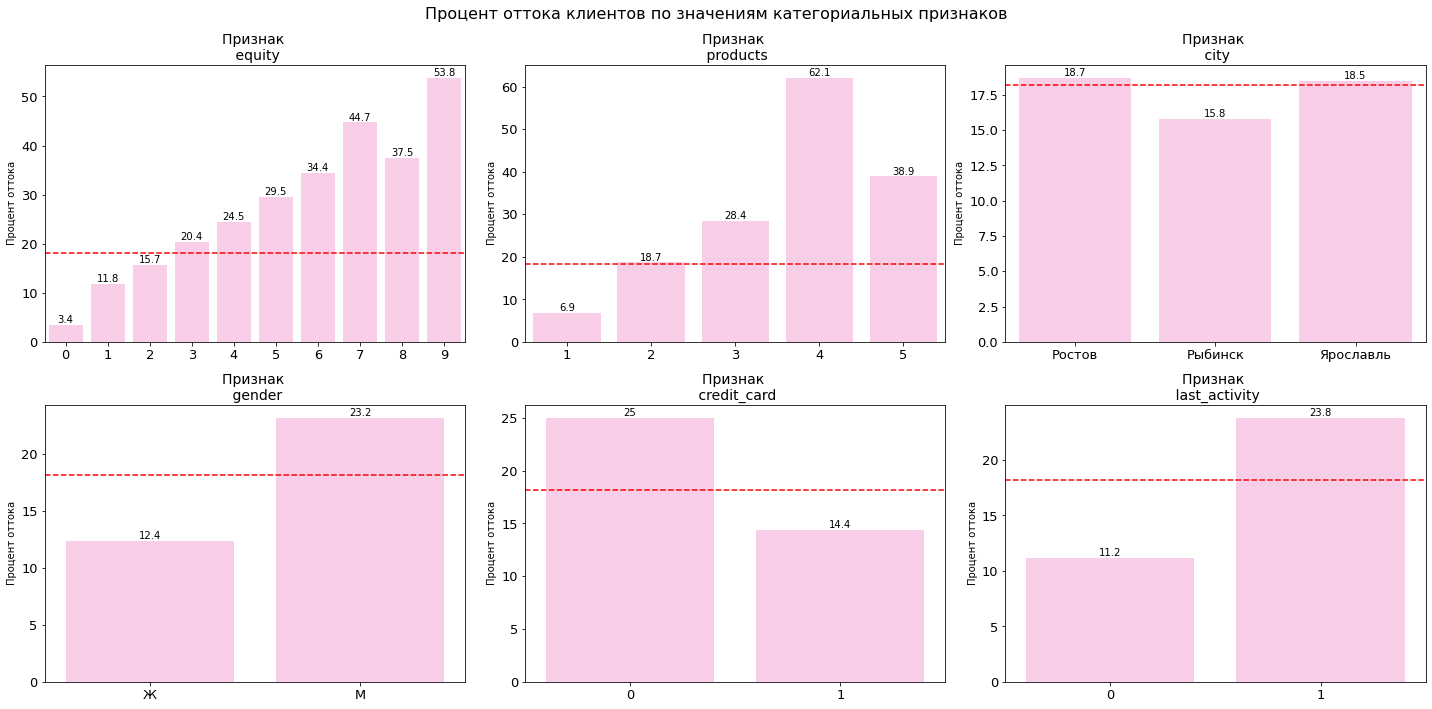

In [53]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row)).suptitle('Процент оттока клиентов по значениям категориальных признаков', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(),
           y='churn',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Какие тенденции видим по сравнению со средним оттоком по всему датасету (17,8%): 
- чем больше баллов по недвижимости, тем выше процент оттока
- наибольший процент оттока у клиентов более чем с 3 продуктами и лидер среди них с 4 продуктами 
- при распределении по городам нельзя выделить лидера по оттоку, они примерно равны или меньше общему проценту оттока - Ростов и Ярославль на 1 процент выше, Рыбинск на 2 процента ниже
- женщины менее склонны к оттоку, их значение намного ниже среднего оттока. У мужчины отток превышает средний примерно на 5 процентов
- люди без кредитных карт превышают средний отток на 7 процентов, с кредитными картами более постоянные клиенты 
- более активные клиенты выше среднего оттока по банку, в том время как неактивные имеют отток всего 11 процентов. Вероятно это связано с тем, что активные чаще звонят в тех поддержку с проблемами и ругаются персоналом банка 

Исходя из анализа выше можем выделить следующие интервалы для анализа. Нам важно учитывать 2 величины - размер полученного среза и высокий процент оттока по значениям 
- оценка недвижимости. Нам интересны интервалы значений от 3 баллов 
    - с 6 до 9 - несмотря на то, что там маленькое число клиентов - около 250 - это отдельный пласт с очень высоким процентом оттока. Возможно будем объединять этот интервал с близлежащим 
    - 4 и 5 имеют высокий процент оттока (24 и 29) и по 1800 клиентов. Их можно рассматривать как по отдельности, так и вместе 
    - 3 имеет самый маленький процент оттока (20) и 1 500 клиентов. Имеет смысл либо не рассматривать его, либо присоединять к 4 и 5 
- количество продуктов - от 2 
    - с 2 продуктами не сильно отличаются от среднего оттока - на 1 процент, но у них самое большое количество клиентов, поэтому не стоит ограничивать по 2 продуктам когда будем смотреть сочетания параметров 
    - 3, 4 и 5 стоит рассматривать как один интервал, потому что в сумме у них около 1 500 клиентов 
- город - поскольку нет выявленного лидера, то не стоит отсекать по этому признаку, он не показательный 
- гендер - имеет смысл рассматривать только мужчин, как наиболее склонных к оттоку 
- крединая карта - выделяем клиентов без кредитной карты 
- активность - выделяем активных клиентов 

### Анализ среза датасета с пропусками в балансе 

Построим боскплот с количеством значений качественных признаков (упорядоченных и нет)

In [54]:
df_bank.query('balance.isnull()').shape[0]

2259

In [55]:
print('Процент оттока по клиентам с пропущенным балансом:', 
      format(df_bank.query('balance.isnull()')['churn'].mean(), '.2%'))

Процент оттока по клиентам с пропущенным балансом: 0.53%


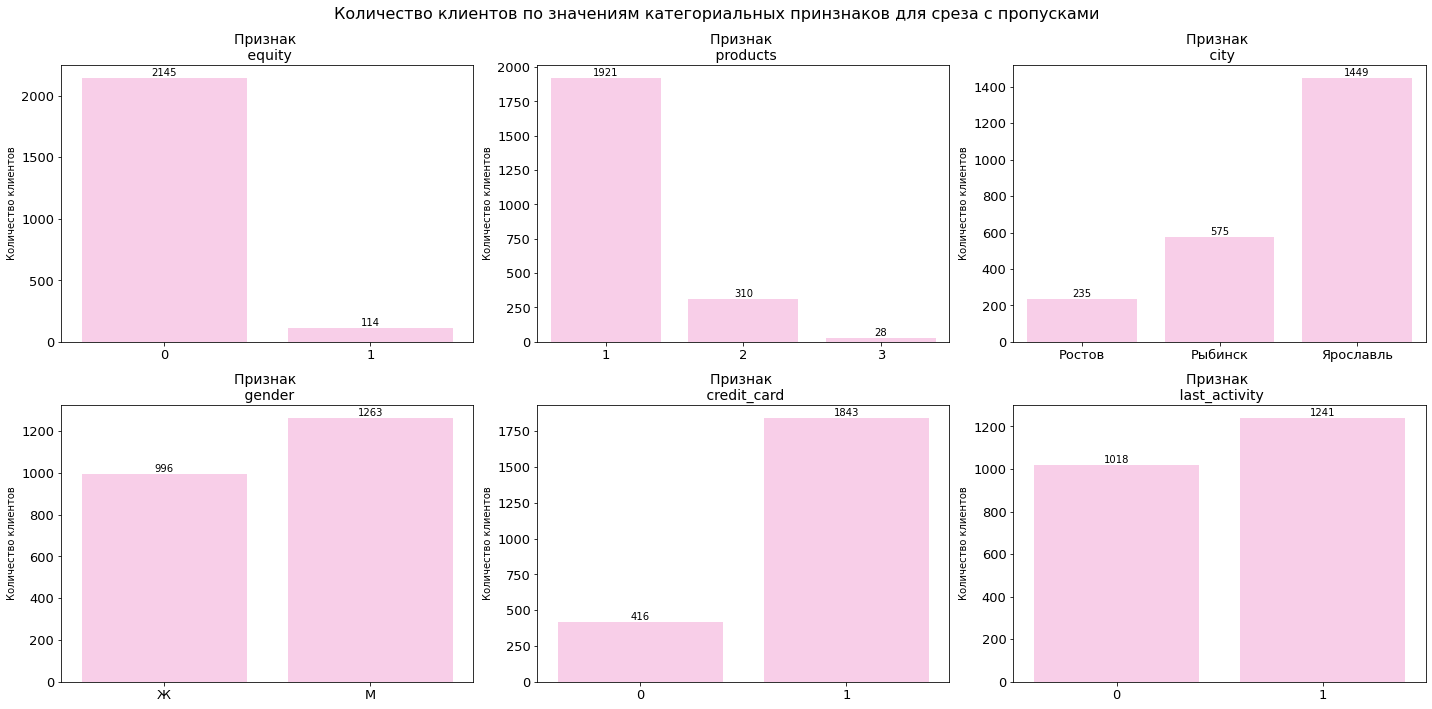

In [56]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row))\
.suptitle('Количество клиентов по значениям категориальных принзнаков для среза с пропусками', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.query('balance.isnull()').groupby(i).agg({'user_id':'count'}).reset_index(),
           y='user_id',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(None)
    plt.ylabel('Количество клиентов')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Подсчитаем процент оттока по каждому значению категориальных признаков

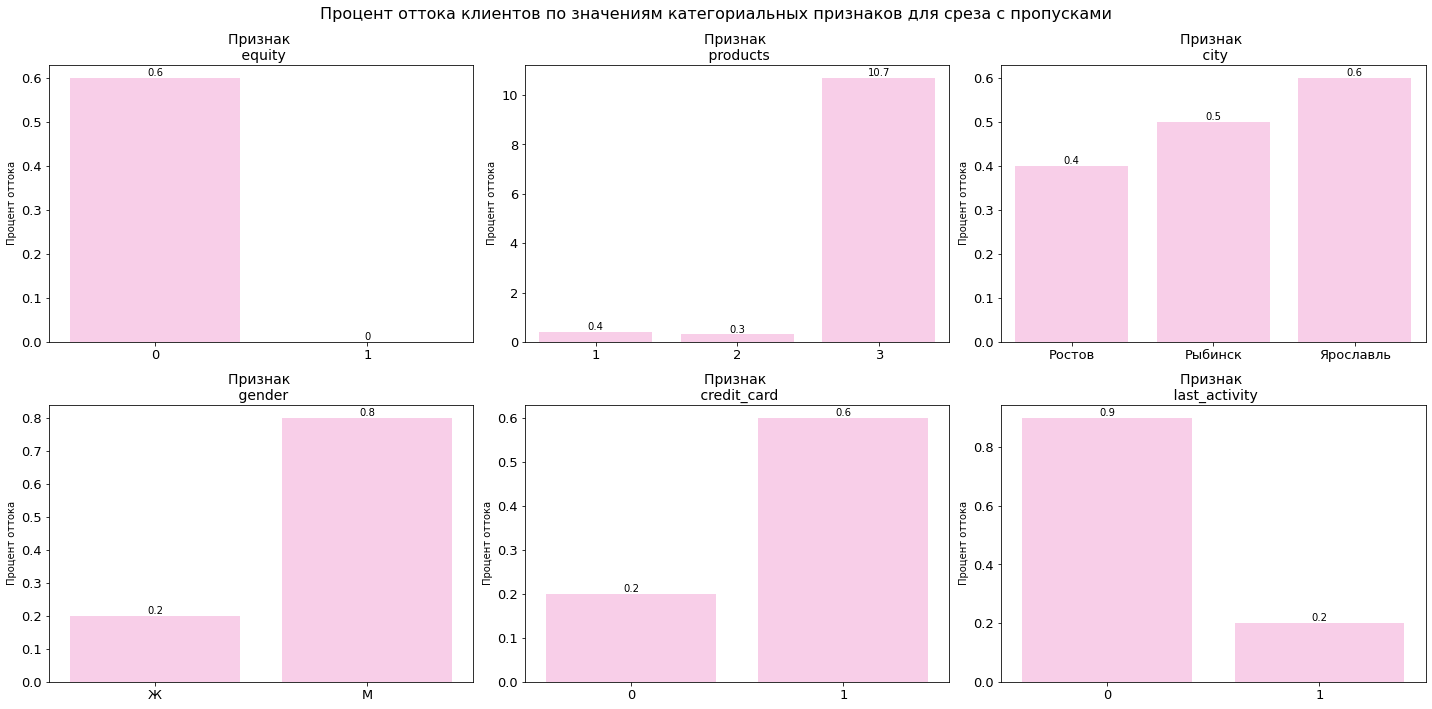

In [57]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row))\
.suptitle('Процент оттока клиентов по значениям категориальных признаков для среза с пропусками', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.query('balance.isnull()').groupby(i)\
                      .agg({'churn':'mean'}).mul(100).round(1).reset_index(),
           y='churn',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
  #  plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

По категориальным значениям видно, что срез содержит в основном клиентов с 0 оценкой собственности и имеющих 1 продукт. Ни один из категориальных признаков не дает высокого показателя оттока. Поэтому при выявлении сегментов по категориальным признакам можно будет это учитывать и попробовать не добавлять клиентов с пропущенны балансом 

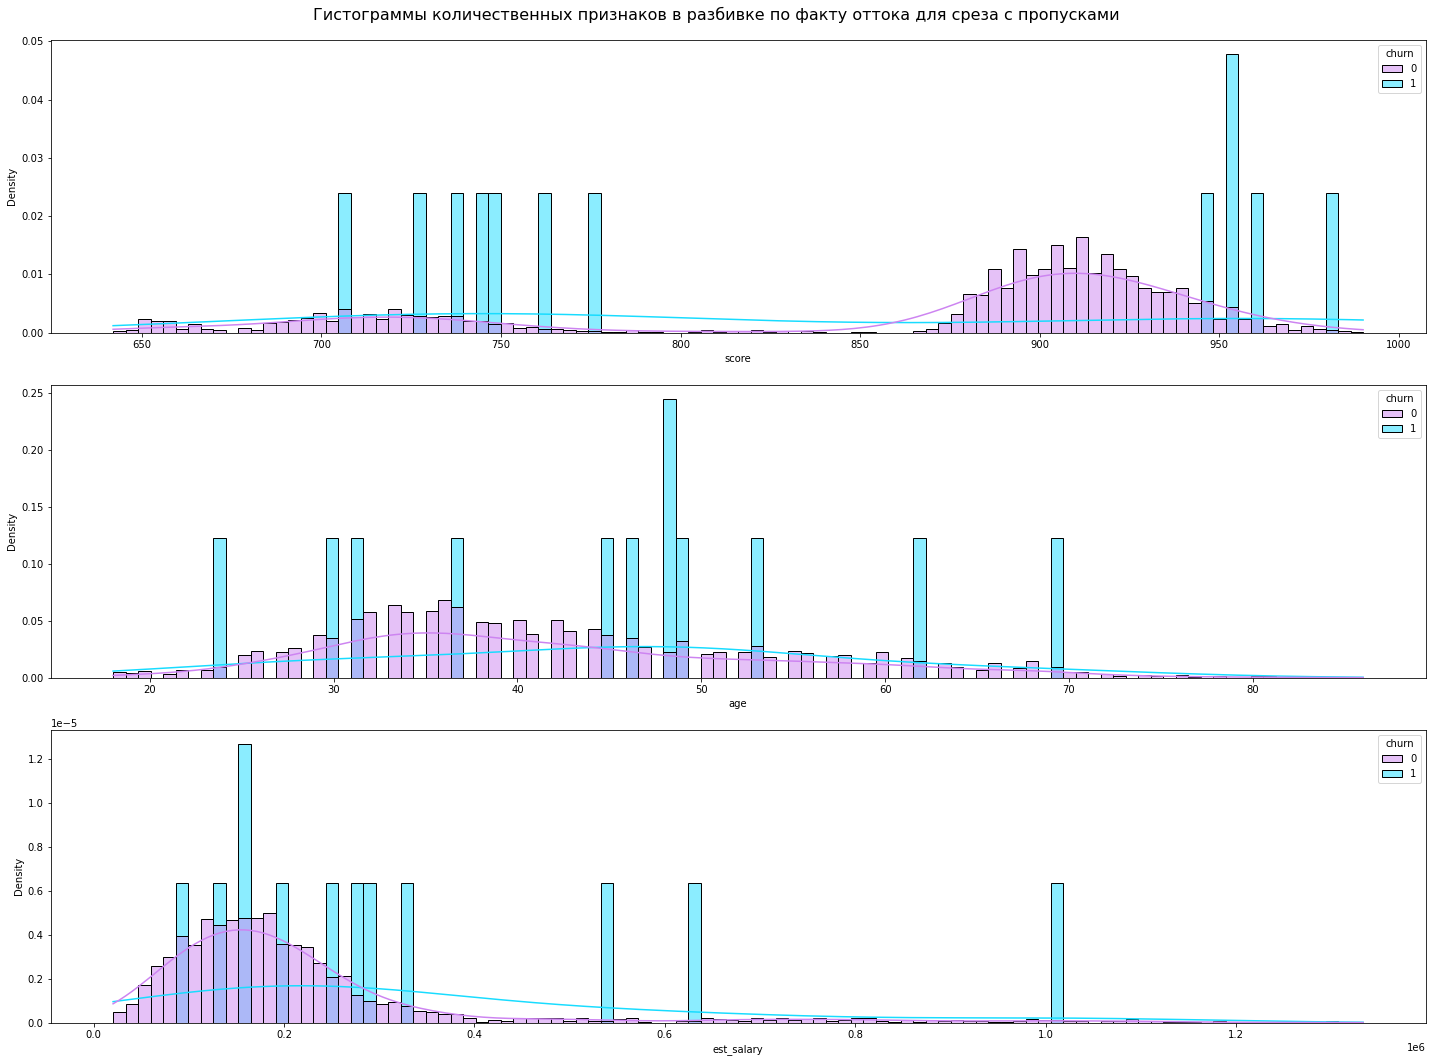

In [58]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 2 графика 
count_plt_row = math.ceil(len(['score','age','est_salary'])/1)

plt.figure(figsize=(20, 5 * count_plt_row))\
.suptitle('Гистограммы количественных признаков в разбивке по факту оттока для среза с пропусками', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(['score','age','est_salary']):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.histplot(data=df_bank.query('balance.isnull()'), x=i, hue='churn', kde=True,
                       common_norm=False, stat='density', palette=['#cd84f1','#18dcff'], bins=100)
    

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.95) 
plt.show()

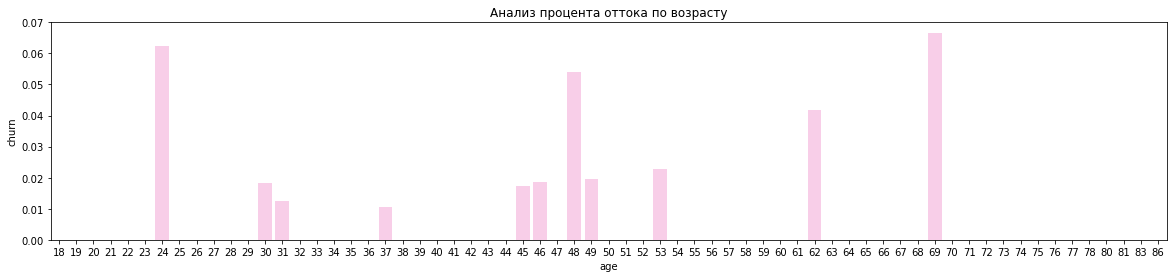

In [59]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_bank.query('balance.isnull()').groupby('age').agg({'churn':'mean'}).reset_index(),
           y='churn',
           x='age', palette=['#FFC7EA']) 
#plt.axhline(y=df_churn_common_percent, color='red', linestyle='--')
plt.title('Анализ процента оттока по возрасту')

plt.show()

Для отношения отточных и оставшихся клиентов видим что отток немного растет для клиентов с баллами скоринга от 750 до 800. По зарплате отток становится выше при зарплате от 300-400 тыс. Посмотрим много ли таких клиентов и какой там реальный процент оттока

In [60]:
print('Количество клиентов с зп больше 300 и пропусками в балансе:', 
      df_bank.query('balance.isnull() and est_salary_ths > 300').shape[0])

Количество клиентов с зп больше 300 и пропусками в балансе: 345


In [61]:
print('Отток клиентов с зп больше 300 и пропусками в балансе:',
      format(df_bank.query('balance.isnull() and est_salary_ths > 300')['churn'].mean(), '.2%'))
print('Отток клиентов с зп больше 400 и пропусками в балансе:',
      format(df_bank.query('balance.isnull() and est_salary_ths > 400')['churn'].mean(), '.2%'))

Отток клиентов с зп больше 300 и пропусками в балансе: 1.16%
Отток клиентов с зп больше 400 и пропусками в балансе: 1.40%


In [62]:
print('Количество клиентов со скорингом от 730 до 850 и пропусками в балансе:', 
      df_bank.query('balance.isnull() and score > 730 and score < 850').shape[0])

Количество клиентов со скорингом от 730 до 850 и пропусками в балансе: 172


In [63]:
print('Отток клиентов со скорингом от 730 до 850 и пропусками в балансе:',
      format(df_bank.query('balance.isnull() and score > 730 and score < 850')['churn'].mean(),'.2%'))


Отток клиентов со скорингом от 730 до 850 и пропусками в балансе: 2.91%


Все равно для клиентов с пропусками в балансе видим очень маленький отток, даже по выделяющимся на графике более отточным признакам

## Кластеризация клиентов 

Проверим, помогут ли нам методы машинного обучения выделить сегменты клиентов с оттоком выше среднего по банку 



### Подготовка датасета для кластеризации

Перед выполнением кластеризации клиентов подсчтаем число рекомендуемых кластеров, выполним стандартизацию датасета, перед этим выделив матрицу признаков клиента и преобразов ее в полностью числовые значения 

In [64]:
# вспомним структуру датасета 
df_bank.head(1)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_ths,est_salary_ths,gender__Ж,gender__М,city__Ростов,city__Рыбинск,city__Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59.21482,75.71914,1,0,0,1,0


In [65]:
df_bank.isnull().sum()

user_id               0
score                 0
city                  0
gender                0
age                   0
equity                0
balance            2259
products              0
credit_card           0
last_activity         0
est_salary            0
churn                 0
balance_ths        2259
est_salary_ths        0
gender__Ж             0
gender__М             0
city__Ростов          0
city__Рыбинск         0
city__Ярославль       0
dtype: int64

Столбцы 'user_id' (не несет ценности для кластеризации), 'balance', 'est_salary' (оставим дублирующие ths), city и gender (они уже перекодированы в бинарные). Также перед стандартизацией нам надо избавиться от пропусков в датасете - т.к. мы выше выявили, что у клиентов пропусками в балансе почти нет оттока, то мы можем избавиться от этих записей и не заполнять заглушками. 

In [66]:
df_cluster = df_bank.drop(['user_id', 'balance', 'est_salary', 'city', 'gender'], axis=1).dropna().copy(deep=True)
# проверка нового датасета
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7570 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            7570 non-null   int64  
 1   age              7570 non-null   int64  
 2   equity           7570 non-null   int64  
 3   products         7570 non-null   int64  
 4   credit_card      7570 non-null   int64  
 5   last_activity    7570 non-null   int64  
 6   churn            7570 non-null   int64  
 7   balance_ths      7570 non-null   float64
 8   est_salary_ths   7570 non-null   float64
 9   gender__Ж        7570 non-null   uint8  
 10  gender__М        7570 non-null   uint8  
 11  city__Ростов     7570 non-null   uint8  
 12  city__Рыбинск    7570 non-null   uint8  
 13  city__Ярославль  7570 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 628.4 KB


In [67]:
# проверка что исходный датасет не изменился 
#df_bank.info()

### Дендрограмма признаков для опредения числа кластеров

Для определения числа рекомендуемых кластеров построим матрицу расстояний и нарисуем дендрограмму. Перед этим стандартизуем наш преобразованный датасет 

In [68]:
#создадим объект класса StandardScaler и применим его к датасету
scaler = StandardScaler() 

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
# стандартизуем на данных без целевого признака churn 
df_matrix_st = scaler.fit_transform(df_cluster.drop(['churn'], axis=1))  
# проверка
#display(df_bank_st[:5])

# сохранем матрицу расстояний 
linked = linkage(df_matrix_st, method = 'ward')

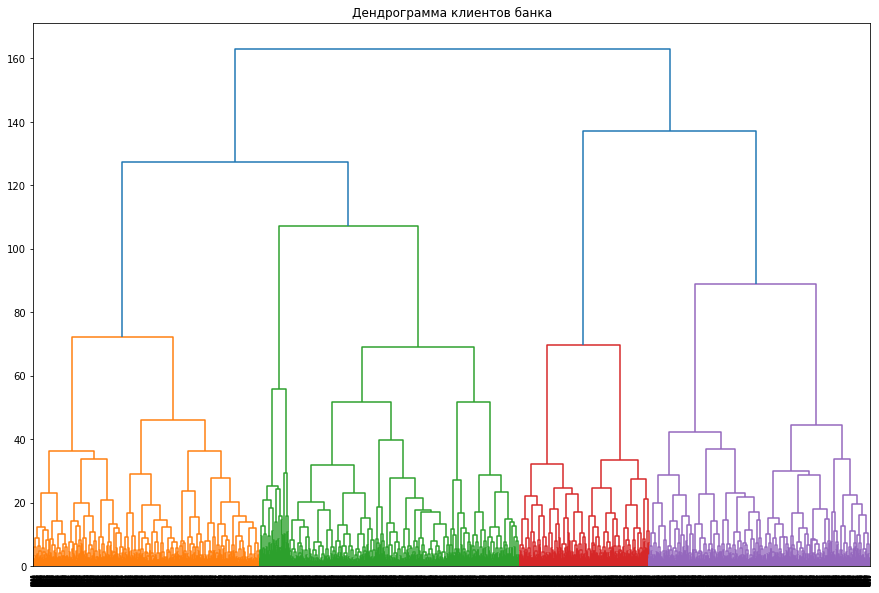

In [69]:
# строим дендрограмму 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма клиентов банка')
plt.show()

Согласно полученной дендрограмме нам рекомендуется для разбиения клиентов на группы использовать 4 кластера  

### Кластеризация клиентов банка - 4 кластера

Разобьем на 4 кластера используя метод K-means

In [70]:
# задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 3)
labels = km.fit_predict(df_matrix_st)

# сохраняем метки кластера в поле нашего датасета
df_cluster['cluster'] = labels

# выводим статистику по средним и медианным значениям всех признаков по кластеру
display(df_cluster.groupby('cluster').mean().T)
#display(df_cluster.groupby('cluster').median().T)

cluster,0,1,2,3
score,843.663830,844.198652,844.457561,836.911864
age,39.895981,44.690337,43.366341,44.243220
equity,3.462884,3.383820,3.329756,3.351695
products,2.132388,2.149213,1.985366,1.999153
credit_card,0.755556,0.608989,0.608780,0.555085
last_activity,0.470449,0.502472,0.562439,0.523729
churn,0.317730,0.176629,0.200000,0.222881
balance_ths,824.360542,735.196511,695.049471,652.054983
est_salary_ths,138.528878,121.683850,112.226724,103.426103
gender__Ж,0.000000,1.000000,0.524390,0.527966


Посмотрим на размерность кластеров

In [71]:
temp_df = df_cluster.groupby('cluster').agg({'cluster':'count'})\
.join(df_cluster.groupby('cluster').agg({'churn':'mean'}))
temp_df['user_churn_count'] = temp_df['cluster'] * temp_df['churn']

temp_df

,cluster,churn,user_churn_count
cluster,,,
0,2115,0.317730,672.0
1,2225,0.176629,393.0
2,2050,0.200000,410.0
3,1180,0.222881,263.0


У нас получилось три кластера с вероятностью оттока больше, чем среднний отток по банку. Нам больше всего интересен кластер с оттоком в почти 32% - он достаточно большой (2 115 клиентов), значит мы теряем в этом кластере 672 клиента - это значимый результат при исходном размере датасете в 10 тыс клиентов. Посмотрим на его отличительные особенности и также обратим внимание на то, что процент оттока чуть ниже среднего по банку только у одного кластера (17,6 %)

In [72]:
print('Процент оттока при объединении кластеров с 22 и 31 процентами оттока:',
df_cluster.loc[df_cluster['cluster'].isin([0,3]),'churn'].mean())

Процент оттока при объединении кластеров с 22 и 31 процентами оттока: 0.283763277693475


Стоит обратить внимание на общие особенности кластеров с 22 и 31 процентами оттока, потому что комбинация этих клиентов дает 28% оттока и их общее число клиентов этого кластера чуть больше 3 тыс клиентов 

При перезапуске ячеек номера кластеров могут поменяться, поэтому добавим результат кода предыдущей ячейки в виде картинки 

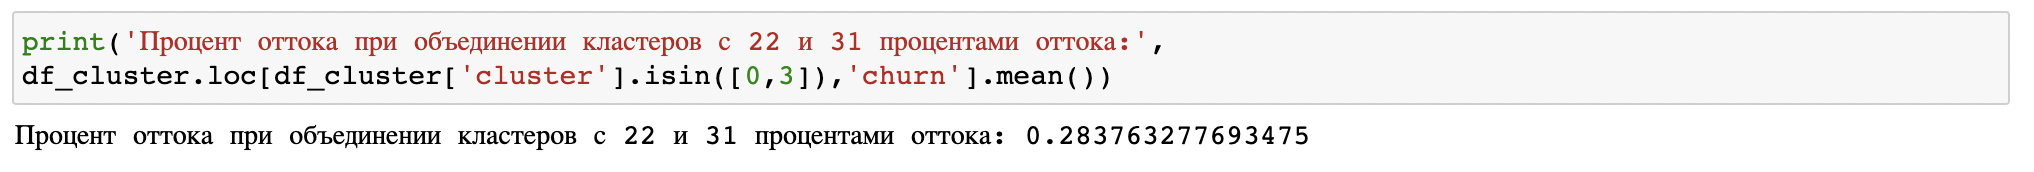

### Исследование кластеров

In [73]:
# список для количественных параметров 
quant_param_list_cluster = ['score', 'age', 'balance_ths','est_salary_ths']

# список для категориальных параметров 
cat_param_list_cluster = ['credit_card', 'last_activity', 'equity', 'products', 'city__Ростов',
                          'city__Рыбинск', 'city__Ярославль', 'gender__Ж', 'gender__М']

Построим столбчатые диаграммы для категориальных признаков в разбивке по кластерам - они помогут обнаружить отличительные особенности кластеров

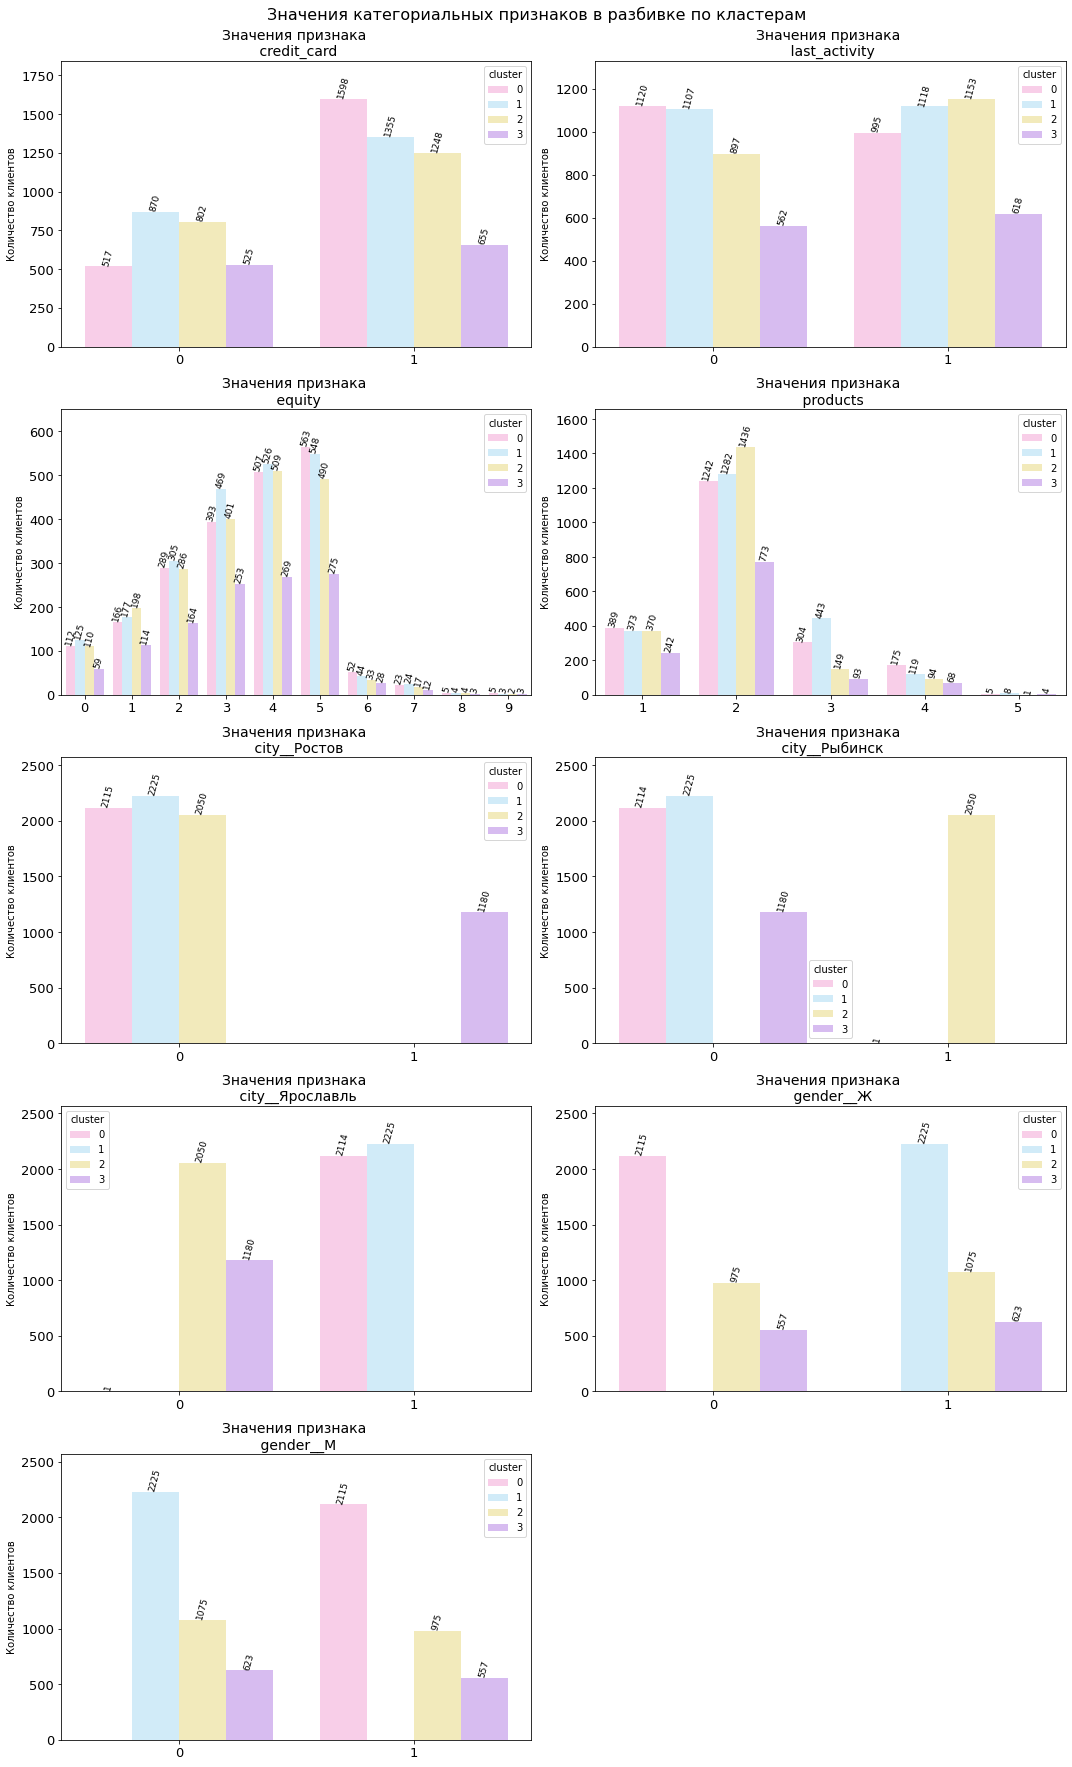

In [74]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 

count_plt_row = math.ceil(len(cat_param_list_cluster)/2)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Значения категориальных признаков в разбивке по кластерам', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 2, counter+1)
    
    ax1 = sns.barplot(data=df_cluster[['cluster', i]].value_counts().sort_values(ascending=False).reset_index(),
           x=i, y=0, hue='cluster', palette=['#FFC7EA', '#CAEDFF', '#FBF0B2', '#D8B4F8'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container, rotation=75, fontsize=9)
    
    plt.title('Значения признака \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/10)
    plt.xlabel(None)
    plt.ylabel('Количество клиентов')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.95) 
plt.show()

Посмотрим процент оттока по каждому значению признака внутри кластера 

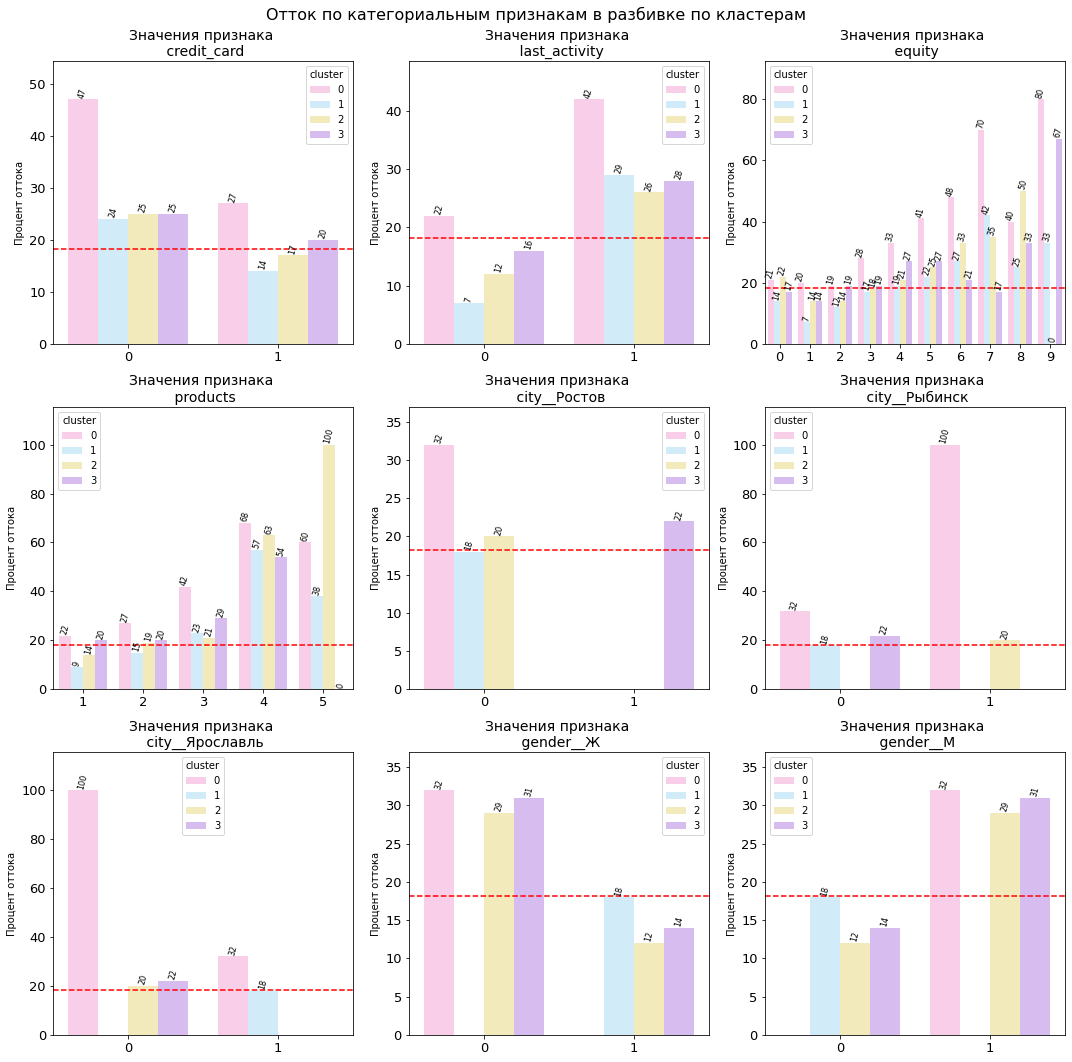

In [75]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 

count_plt_row = math.ceil(len(cat_param_list_cluster)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Отток по категориальным признакам в разбивке по кластерам', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_cluster.groupby(['cluster',i]).agg({'churn':'mean'}).mul(100).round(0).reset_index(),
           x=i, y='churn', hue='cluster', palette=['#FFC7EA', '#CAEDFF', '#FBF0B2', '#D8B4F8'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container, rotation=75, fontsize=8)
    
    plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    plt.title('Значения признака \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/10)
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.93) 
plt.show()

Какие комбинации признаков можем отменить для выделения сегментов:
- по кластеру с 31 процентом оттока:
    - есть клиенты с картами и нет, клиенты дают высокий отток независимо от крединой карты, но чуть больший отток дают клиенты без крединой карты 
    - есть активные и неактивные клиенты, клиенты дают высокий отток независимо от активности, но активные клиенты чуть больший отток 
    - независимо от оценки собственности отток высокий - в кластере есть все баллы 
    - есть все продукты и они дают отток больше среднего, но больше всего значения у продуктов больше 3 
    - клиенты только из Рыбинска и Ярославля и они дают высокий отток. Клиентов из Ростова нет вообще
    - клиенты только мужского пола и они дают высокий отток. Женского гендера в кластере нет вообще 
- по кластеру с 22 процента оттока: 
    - есть клиенты с картами и нет, клиенты дают отток чуть выше среднего независимо от крединой карты, но чуть больший отток дают клиенты без крединой карты
    - есть активные и неактивные клиенты, только активнык клиенты дают высокий отток 
    - с кластере есть все баллы собственности, но наибольший отток дают 4 5 8 9 
    - есть все продукты и они дают отток больше среднего, кроме клиентов с 5 продуктами 
    - клиенты только из Ростова и они дают отток выше среднего 
    - клиенты обоих гендеров, но высокий отток только у мужчин 

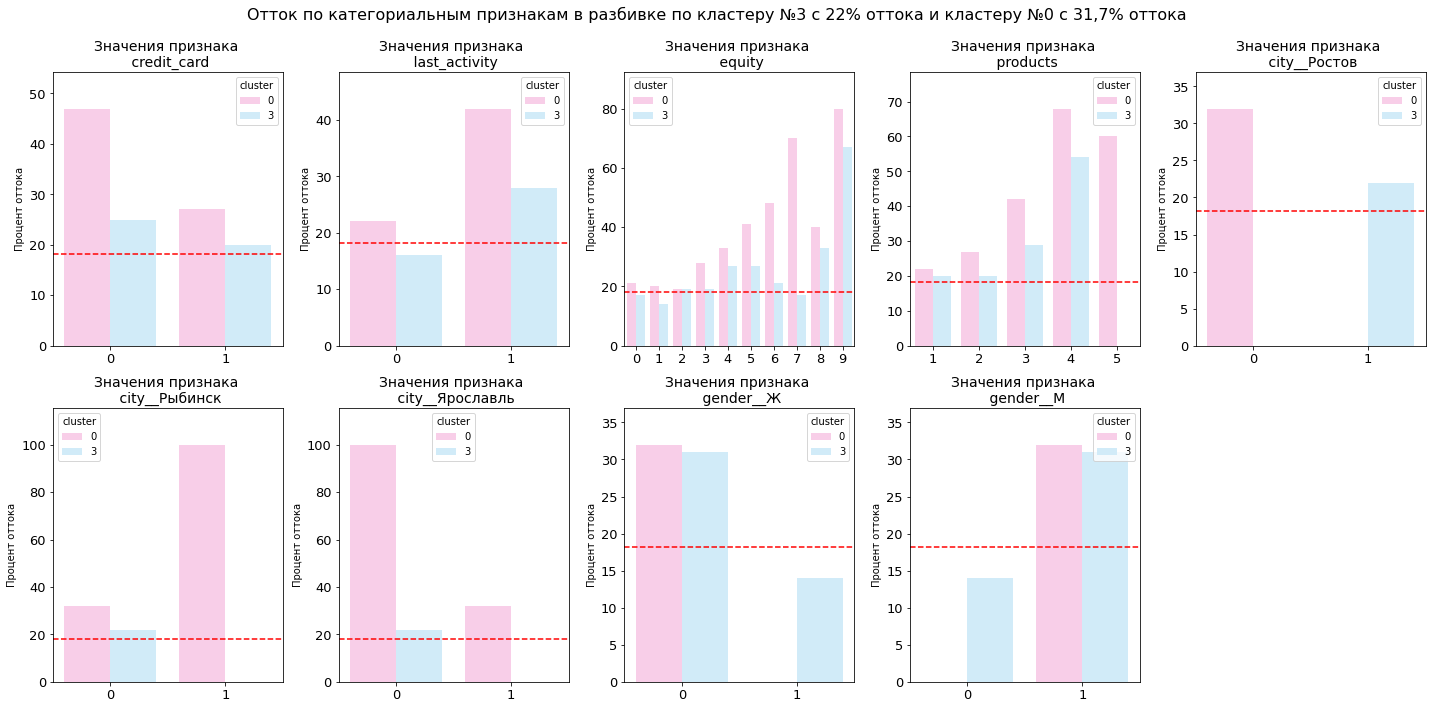

In [76]:
# график для презентации 

# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 

count_plt_row = math.ceil(len(cat_param_list_cluster)/5)

plt.figure(figsize=(20, 5 * count_plt_row))\
.suptitle('Отток по категориальным признакам в разбивке по кластеру №3 с 22% оттока и кластеру №0 с 31,7% оттока', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 5, counter+1)
    
    ax1 = sns.barplot(data=df_cluster.query('cluster.isin([0,3])')\
                      .groupby(['cluster',i]).agg({'churn':'mean'}).mul(100).round(0).reset_index(),
           x=i, y='churn', hue='cluster', palette=['#FFC7EA', '#CAEDFF', '#FBF0B2', '#D8B4F8'])
    
    # устанавливаем подписи на бары 
  #  for container in ax1.containers:
   #     ax1.bar_label(container, rotation=75, fontsize=8)
    
    plt.axhline(y=df_churn_common_percent*100, color='red', linestyle='--')
    plt.title('Значения признака \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax1.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]+ax1.get_ylim()[1]/10)
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.89) 
plt.show()

Построим распределения для количественных признаков 

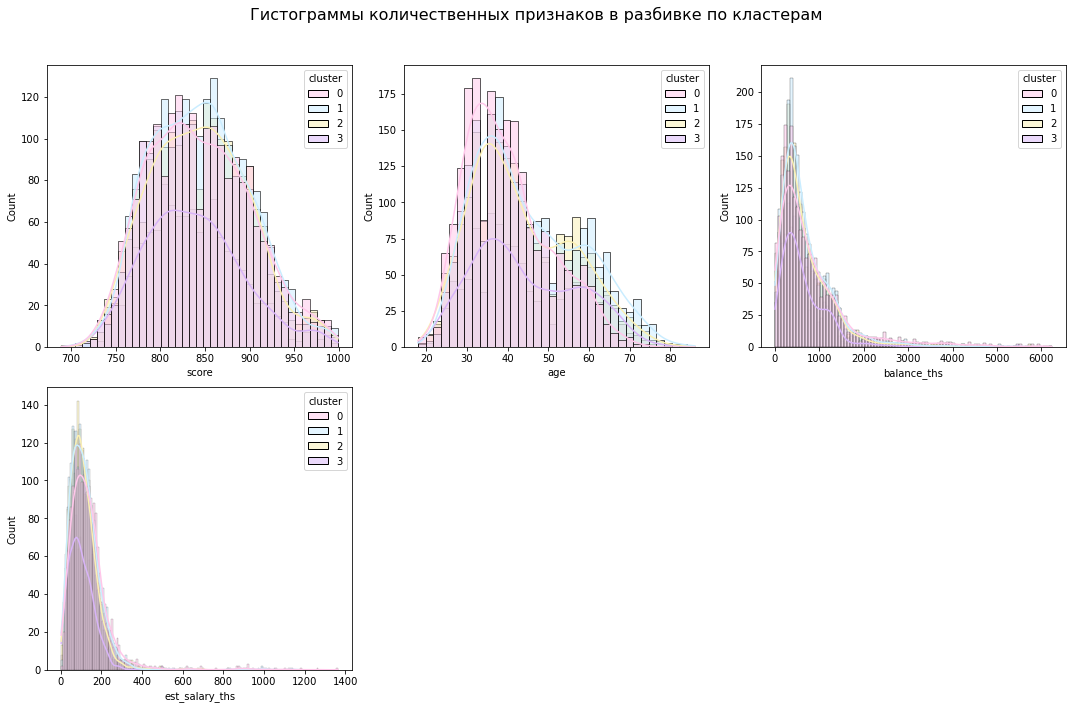

In [77]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list_cluster)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Гистограммы количественных признаков в разбивке по кластерам', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.histplot(data=df_cluster, kde=True, x=i, hue='cluster', 
                       palette=['#FFC7EA', '#CAEDFF', '#FBF0B2', '#D8B4F8'])
    

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

Такие гистограммы оказались мало информативные, поэтому построим плотность вероятности оттока по количественным признакам для кластеров, которые нас интересуют. 

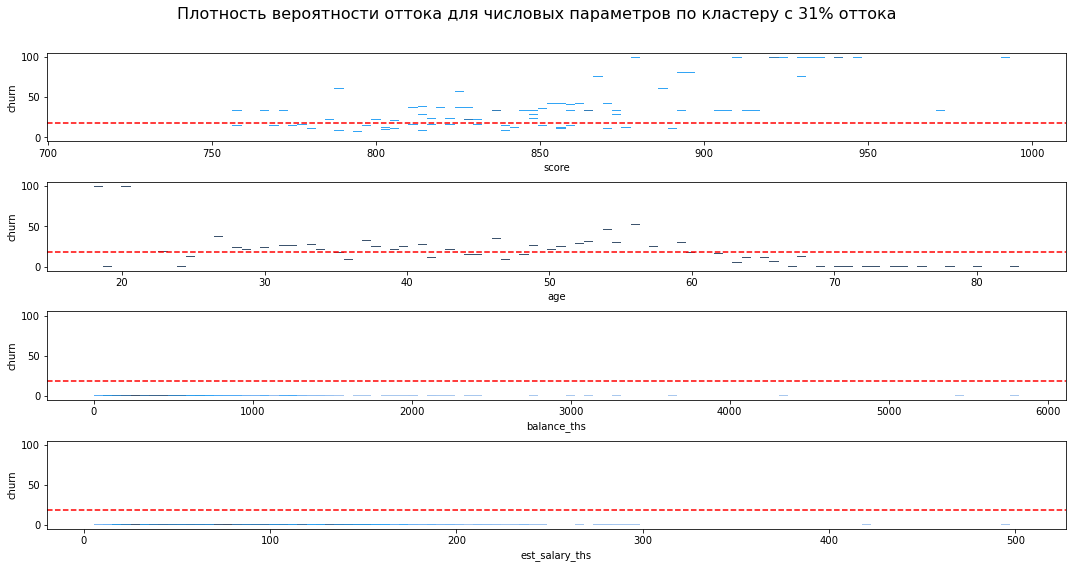

In [78]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list_cluster)/1)

plt.figure(figsize=(15, 2 * count_plt_row))\
.suptitle('Плотность вероятности оттока для числовых параметров по кластеру с 31% оттока', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.histplot(data=df_cluster[df_cluster['cluster']==3]\
                       .groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(), 
             x=i,y='churn',bins=100,
            common_norm=True)
    
    plt.axhline(y=18.2, color='red', linestyle='--')
    
    
plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

После перезапуска ячейки номер кластера может измениться, поэтому сохраним скрин результата 

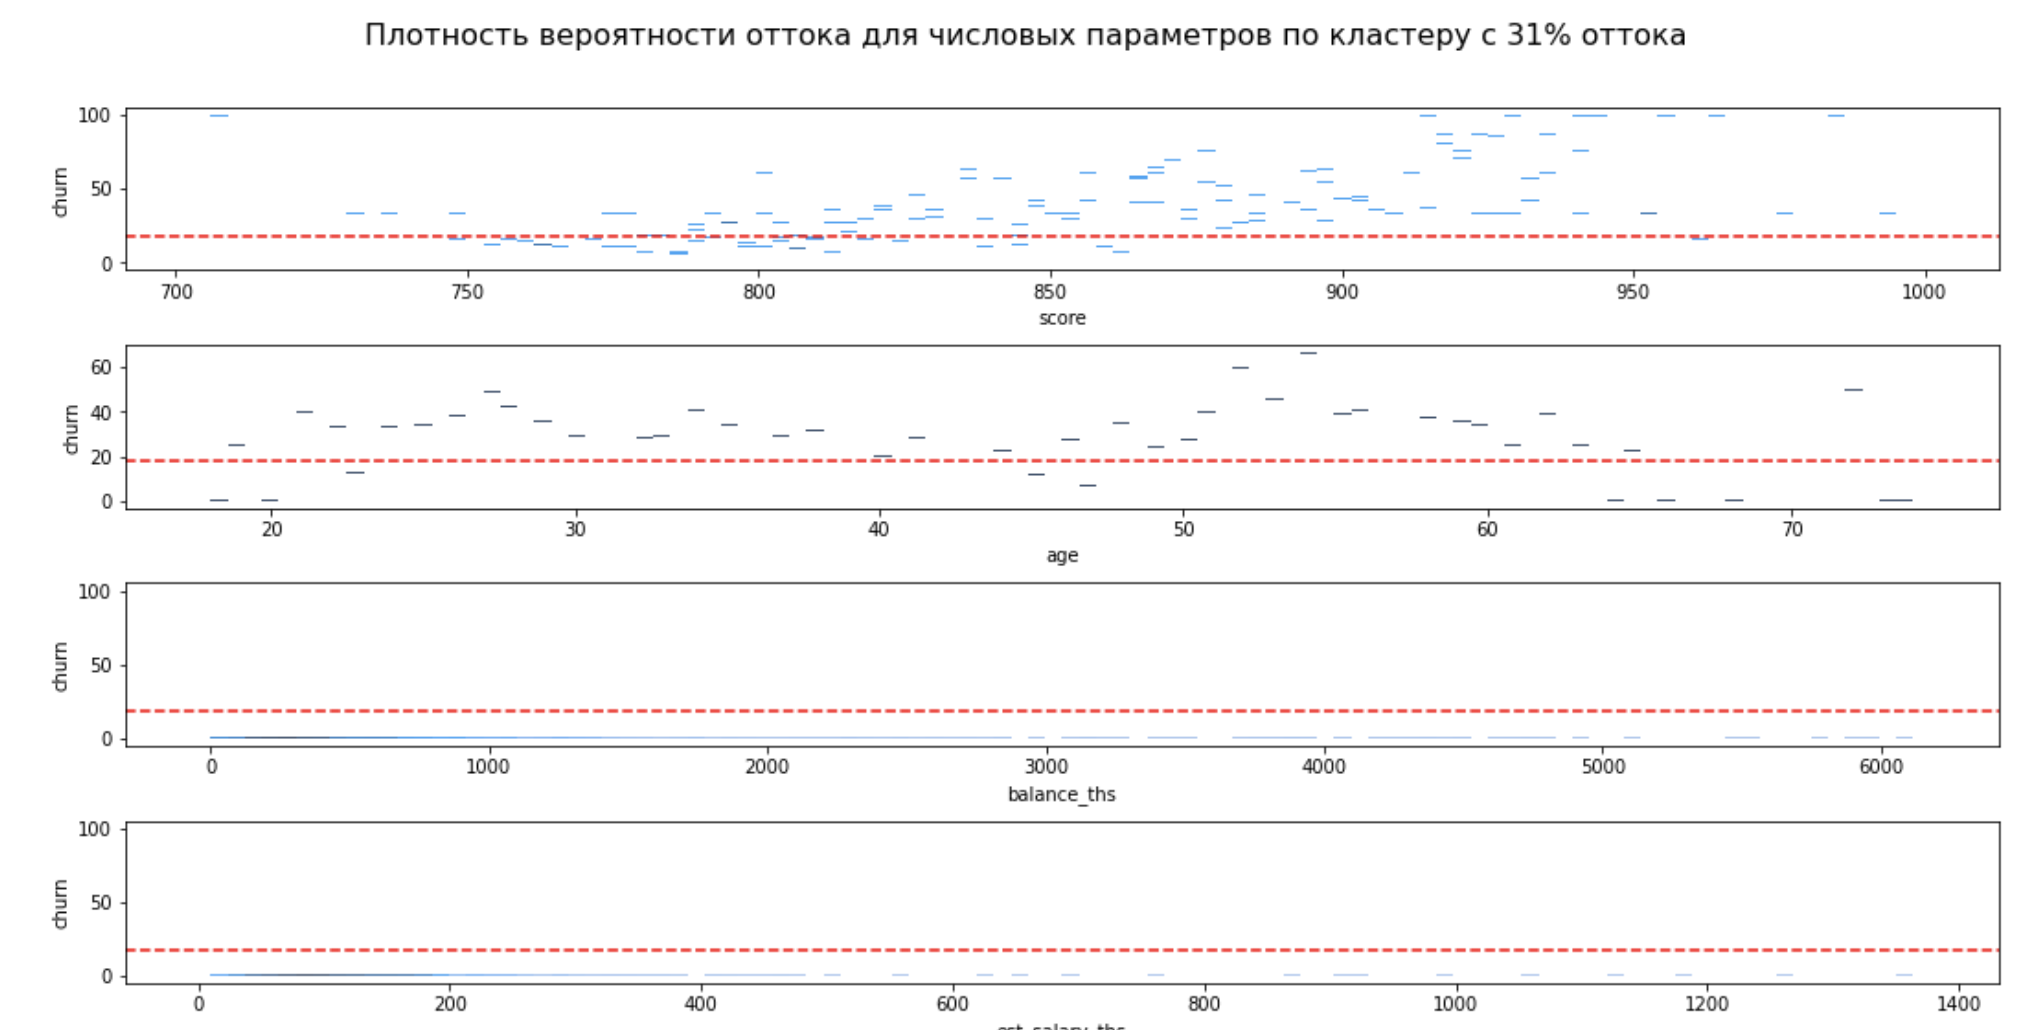

- оценка скоринга - наибольший отток на значениях больше 800 
- почти все возраста дают отток, но наибольший с 50 до 60 


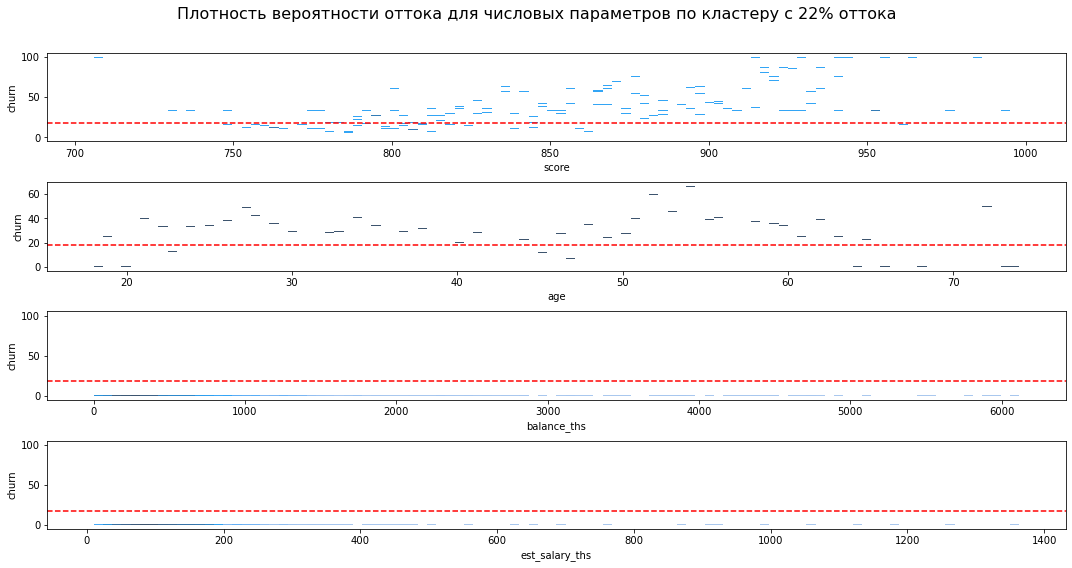

In [79]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(quant_param_list_cluster)/1)

plt.figure(figsize=(15, 2 * count_plt_row))\
.suptitle('Плотность вероятности оттока для числовых параметров по кластеру с 22% оттока', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(quant_param_list_cluster):
        
    ax = plt.subplot(count_plt_row, 1, counter+1)
    
    ax1 = sns.histplot(data=df_cluster[df_cluster['cluster']==0]\
                       .groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(), 
             x=i,y='churn',bins=100,
            common_norm=True)
    
    plt.axhline(y=17.8, color='red', linestyle='--')
    
    
plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

После перезапуска ячейки номер кластера может измениться, поэтому сохраним скрин результата 

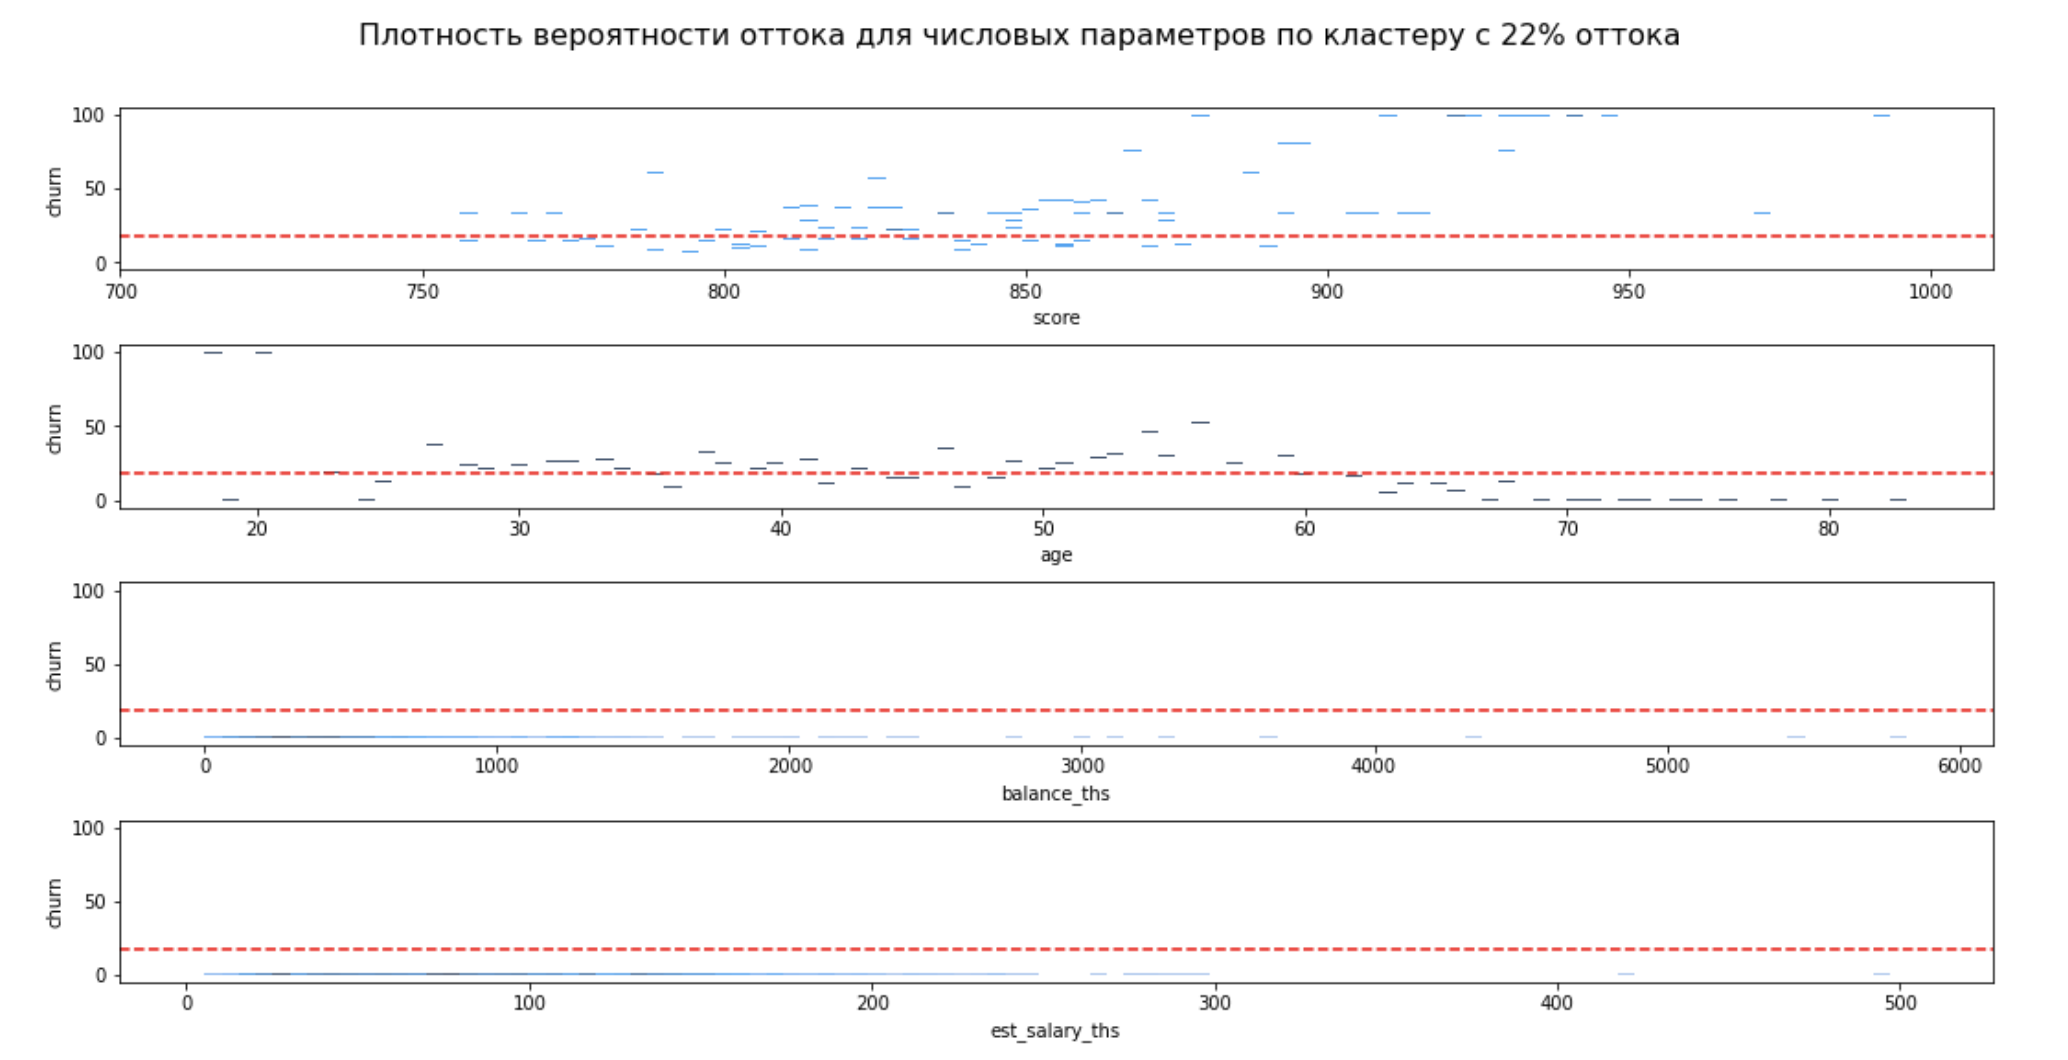

- оценка скоринга - стабильно большой отток на значениях больше примерно 880
- стабильный отток дают возраста от 26 до 42 и с 48 до 59 


### Дендрограмма признаков для опредения числа кластеров (с признаком churn)

Поскольку наша цель - выявить наиболее отточных клиентов, а не получить портреты клиентоы, то можем попробовать кластеризацию без удаления целевого признака. В этом случае есть веорятность, что выделится кластер с наиболее отточными клиентами. Для определения числа рекомендуемых кластеров построим также матрицу расстояний и нарисуем дендрограмму, но на датасете без удаленного целевого признака. Перед этим стандартизуем наш преобразованный датасет 

In [80]:
df_cluster2 = df_bank.drop(['user_id', 'balance', 'est_salary', 'city', 'gender'], axis=1).dropna().copy(deep=True)

In [81]:
df_cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7570 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            7570 non-null   int64  
 1   age              7570 non-null   int64  
 2   equity           7570 non-null   int64  
 3   products         7570 non-null   int64  
 4   credit_card      7570 non-null   int64  
 5   last_activity    7570 non-null   int64  
 6   churn            7570 non-null   int64  
 7   balance_ths      7570 non-null   float64
 8   est_salary_ths   7570 non-null   float64
 9   gender__Ж        7570 non-null   uint8  
 10  gender__М        7570 non-null   uint8  
 11  city__Ростов     7570 non-null   uint8  
 12  city__Рыбинск    7570 non-null   uint8  
 13  city__Ярославль  7570 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 628.4 KB


In [82]:
#создадим объект класса StandardScaler и применим его к датасету
scaler_churn = StandardScaler() 

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
# стандартизуем на данных без целевого признака churn 
df_matrix_churn_st = scaler_churn.fit_transform(df_cluster2)  
# проверка
#display(df_bank_st[:5])

# сохранем матрицу расстояний 
linked_churn = linkage(df_matrix_churn_st, method = 'ward')

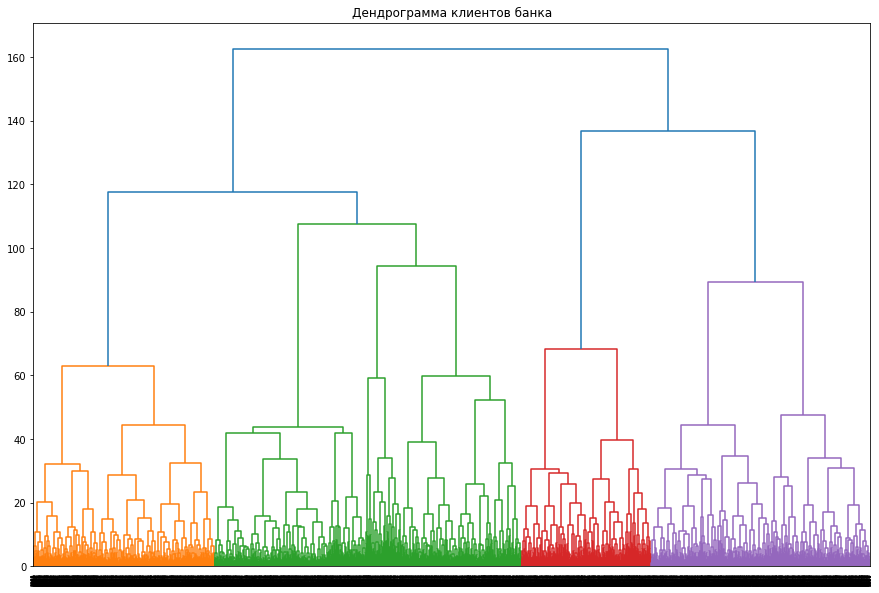

In [83]:
# строим дендрограмму 
plt.figure(figsize=(15, 10))  
dendrogram(linked_churn, orientation='top')
plt.title('Дендрограмма клиентов банка')
plt.show()

Согласно полученной дендрограмме, построенной на датасете с целевым признаком, нам рекомендуется для разбиения клиентов на группы использовать 4 кластера  

### Кластеризация клиентов банка - 4 кластера c оттоком как признаком 

Разобьем на 4 кластера используя метод K-means

In [84]:
# задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(df_matrix_churn_st)

# сохраняем метки кластера в поле нашего датасета
df_cluster2['cluster'] = labels

# выводим статистику по средним и медианным значениям всех признаков по кластеру
display(df_cluster2.groupby('cluster').mean().T)
#display(df_cluster.groupby('cluster').median().T)

cluster,0,1,2,3
score,836.911864,844.457561,843.663830,844.198652
age,44.243220,43.366341,39.895981,44.690337
equity,3.351695,3.329756,3.462884,3.383820
products,1.999153,1.985366,2.132388,2.149213
credit_card,0.555085,0.608780,0.755556,0.608989
last_activity,0.523729,0.562439,0.470449,0.502472
churn,0.222881,0.200000,0.317730,0.176629
balance_ths,652.054983,695.049471,824.360542,735.196511
est_salary_ths,103.426103,112.226724,138.528878,121.683850
gender__Ж,0.527966,0.524390,0.000000,1.000000


При разбиении на 4 кластера и кластеризации с удаленным целевым признаком оттока были получены кластеры аналогичным процентом оттока. Поэтому текущую кластеризацию на 4 кластера, проведенную без удаления признака оттока, считаем менее полезной и исследовать ее нет смысла 

## Проверка гипотез 

- Гипотеза 1. Проверить зависимоть между уровнем денежного состояния клиента (уровнем заработной платы и балансом на счете) и вероятностью ухода 
- Гипотеза 2. Проверить влияние баллов кредитного скоринга на вероятность ухода 
- Гипотеза 3. Определить склонны ли к уходу неактивные клиенты 
- Гипотеза 4. Определить склонны ли к уходу клиенты, у которых мало банковских продуктов
- Гипотеза 5. Проверить зависимость между наличием кредтной карты и вероятностью ухода клиента 
- Гипотеза 6. Определить склонны ли к уходу клиенты определенных возрастных групп 

### Проверка гипотезы о различии дохода между оставшимися и ушедшими клиентами 

Для проверки гипотезы о различии дохода между оставшимися и ушедшими клиентами сформулируем двусторонние гипотезы про баланс и зарплату

#### Проверка различия между балансом

Первую проверим гипотезу о балансе 

    Н_0: Баланс счета оставшихся клиентов равен балансу счета ушедших клиентов 
    Н_1: Баланс счета оставшихся клиентов не равен балансу счета ушедших клиентов 
    
Проверка равенства среднего двух генеральных совокупностей - совокупность ушедших клиентов и оставшихся. 

In [85]:
# подчитаем размер выборок 

print('Размер совокупности оставшихся клиентов с ненулевым балансом:', 
      df_bank.loc[(~df_bank['balance'].isna()) & (df_bank['churn'] == 0)].shape[0])
print('Размер совокупности ушедших клиентов с ненулевым балансом:', 
      df_bank.loc[(~df_bank['balance'].isna()) & (df_bank['churn'] == 1)].shape[0])

Размер совокупности оставшихся клиентов с ненулевым балансом: 5832
Размер совокупности ушедших клиентов с ненулевым балансом: 1738


Наши совокупности не зависят друг от друга, но прежде чем выбрать метод статистической проверки посмотрим на распределение двух выборок 

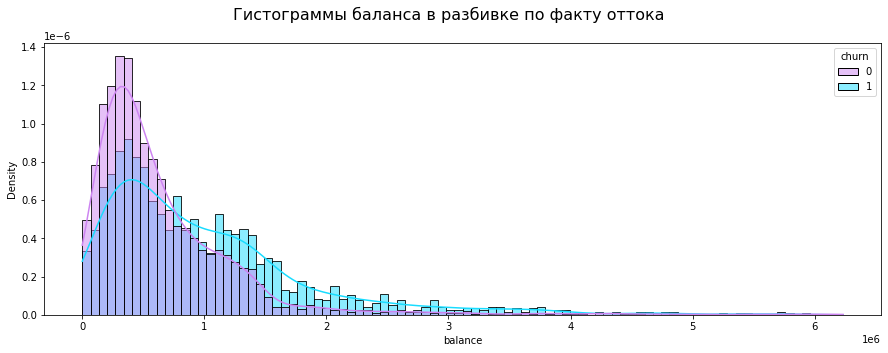

In [86]:
plt.figure(figsize=(15, 5))\
.suptitle('Гистограммы баланса в разбивке по факту оттока', fontsize=16)

sns.histplot(data=df_bank, kde=True, x='balance', hue='churn', common_norm = False, stat ='density',
             palette=['#cd84f1','#18dcff'])
plt.show()

По гистограмме баланса в разбивке по оттоку видно, что оба значения распределены нормально со скосом вправо. Это значит, что среднее обеих совокупностей будет стремится в правую часть за счет длинного хвоста, расположенного справа, и будет больше медианы. 

Проверим выбросы для баланса для отточных и оставшихся клиентов 

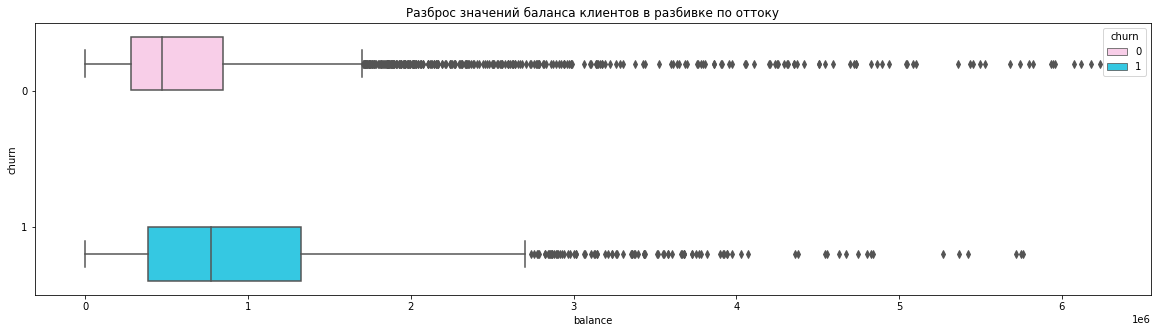

In [87]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_bank, x=df_bank['balance'], y=df_bank['churn'], orient='h', hue='churn', 
            palette=['#FFC7EA', '#18dcff'])
plt.title('Разброс значений баланса клиентов в разбивке по оттоку')
plt.show()

Из боксплотов видно, что несмотря на то, что мы ранее удалили выбросы, в разбивке по оттоку еще остались длинные хвосты, выходящие за межквартильный размах, которые могут исказить результаты теста. 

Поскольку распределение обеих выборов у нас стремится к нормальному, но есть длинные хвосты выбросов, то для сравнения баланса между отточными и оставшимися клиента применим два теста - Т-критерий Стьюдента, который применяется для независимых выборок из совокупностей с нормальным распределением, и тест Манна-Уитни, который чувствителен к выбросам за счет ранжирования значений в выборке 

Поскольку размеры наших выборок не равны, то при T-тесте Стьюедента укажем явный параметр, что считать дисперсии выборок неравными 

In [88]:
print('p-value по Т-тесту Стьюдента:', 
      st.ttest_ind(df_bank.loc[(df_bank['churn']==1) & (~df_bank['balance'].isna())]['balance'],
                   df_bank.loc[(df_bank['churn']==0) & (~df_bank['balance'].isna())]['balance'],
                  equal_var=False).pvalue)

p-value по Т-тесту Стьюдента: 1.6887253184300198e-49


In [89]:
# в функцию для подсчета p-value передадим два набора с балансом для отточных и оставшихся клиентов 
# выведем p-value 
print('p-value по Манну_Уитни:', 
      st.mannwhitneyu(df_bank.loc[(df_bank['churn']==1) & (~df_bank['balance'].isna())]['balance'],
                      df_bank.loc[(df_bank['churn']==0) & (~df_bank['balance'].isna())]['balance'])[1])

p-value по Манну_Уитни: 1.3271040846984892e-66


Полученное значение p-value по результатам обоих тестов настолько мало (е-49 и е-66), что какой бы критический уровень значимости мы не выбрали - 5% или 1% - полученное значение будет значительно меньше. Значит вероятность получить случайно такое различие в выбоках при верной нулевой гипотезе очень мала и мы должны отвергнуть нулевую гипотезу о равенстве баланса между отточными и оставшимися клиентами. Значит при исследовании сегментов мы можем попробовать найти такие значения баланса, при котором есть высокий уровень оттока. Судя по гистограмме эти значения лежат в интервале от 1 млн 

#### Проверка различия между зарплатой 

Первую проверим гипотезу о зарплате  

    Н_0: Вычисленная зарплта оставшихся клиентов равна высчитанной зарплате ушедших клиентов 
    Н_1: Вычисленная зарплта оставшихся клиентов НЕ равна высчитанной зарплате ушедших клиентов 
    
Проверка равенства среднего двух генеральных совокупностей - совокупность ушедших клиентов и оставшихся. 

In [90]:
# подчитаем размер выборок 

print('Размер совокупности оставшихся клиентов с ненулевым балансом:', 
      df_bank.loc[(df_bank['churn'] == 0)].shape[0])
print('Размер совокупности ушедших клиентов с ненулевым балансом:', 
      df_bank.loc[(df_bank['churn'] == 1)].shape[0])

Размер совокупности оставшихся клиентов с ненулевым балансом: 8079
Размер совокупности ушедших клиентов с ненулевым балансом: 1750


Наши совокупности не зависят друг от друга, но прежде чем выбрать метод статистической проверки посмотрим на распределение двух выборок 

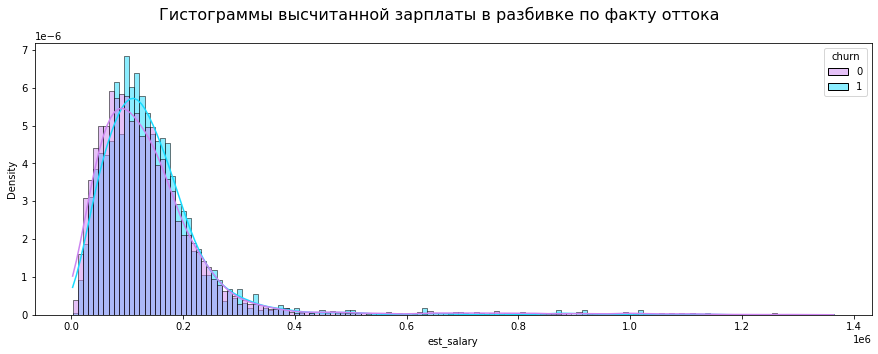

In [91]:
plt.figure(figsize=(15, 5))\
.suptitle('Гистограммы высчитанной зарплаты в разбивке по факту оттока', fontsize=16)

sns.histplot(data=df_bank, kde=True, x='est_salary', hue='churn', common_norm = False, stat ='density',
             palette=['#cd84f1','#18dcff'])
plt.show()

По гистограмме зарплаты в разбивке по оттоку видно, что оба значения распределены нормально со скосом вправо. Это значит, что среднее обеих совокупностей будет стремится в правую часть за счет длинного хвоста, расположенного справа, и будет больше медианы. 

Проверим выбросы для зарплаты для отточных и оставшихся клиентов 

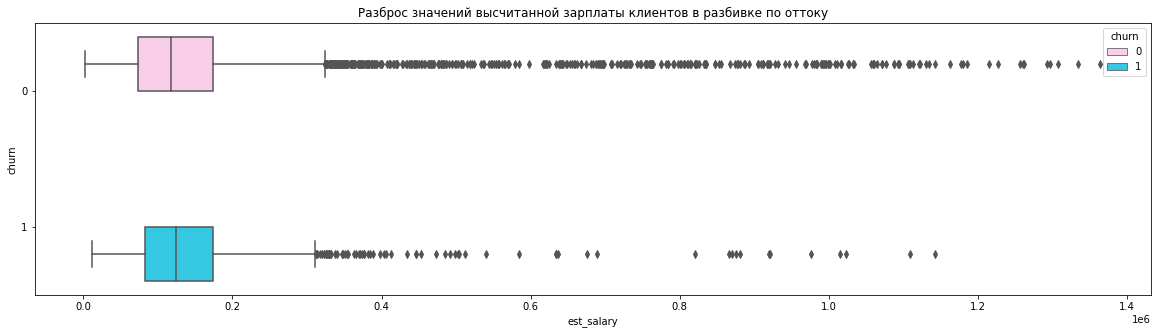

In [92]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_bank, x=df_bank['est_salary'], y=df_bank['churn'], orient='h', hue='churn', 
            palette=['#FFC7EA', '#18dcff'])
plt.title('Разброс значений высчитанной зарплаты клиентов в разбивке по оттоку')
plt.show()

Из боксплотов видно, что есть длинные хвосты, выходящие за межквартильный размах, которые могут исказить результаты теста. 

Поскольку распределение обеих выборов у нас стремится к нормальному, но есть длинные хвосты выбросов, то для сравнения зарплаты между отточными и оставшимися клиента применим два теста - Т-критерий Стьюдента, который применяется для независимых выборок из совокупностей с нормальным распределением, и тест Манна-Уитни, который чувствителен к выбросам за счет ранжирования значений в выборке 

Поскольку раземеры наших выборок не равны, то при T-тесте Стьюедента укажем явный параметр, что считать дисперсии выборок неравными 

In [93]:
print('p-value по Т-тесту Стьюдента:', 
      st.ttest_ind(df_bank.loc[(df_bank['churn']==1)]['est_salary'],
                   df_bank.loc[(df_bank['churn']==0)]['est_salary'],
                  equal_var=False).pvalue)

p-value по Т-тесту Стьюдента: 0.20268879056565944


In [94]:
# в функцию для подсчета p-value передадим два набора с балансом для отточных и оставшихся клиентов 
# выведем p-value 
print('p-value по Манну_Уитни:', 
      st.mannwhitneyu(df_bank.loc[(df_bank['churn']==1)]['est_salary'],
                      df_bank.loc[(df_bank['churn']==0)]['est_salary'])[1])

p-value по Манну_Уитни: 0.0019326925483376413


Полученное значение p-value по результатам обоих тестов различается - почти 20 процентов по Стьюденту и 0,2 процента по Манну-Уитни. Это очень противоречиый результат. По результатам т-теста мы не можем отвергнуть нулевую гипотезу при любом значении уровня значимости (и 1 и 5 процентов). По Манну Уитни наоборот должны даже при 1% значимости. 

Чтобы выбрать какой из тестов принять, посмотри на боксплот - там видно, что если сравнивать выбоки по медиане и межквартильному размаху, то выборки почти равны. Различия в плотности и длине хвоста справа - у клиентов без оттока хвост длинне и плотнее. А т-тест может оказаться чувствительным к большим выбросам   

Чтобы принять решение учитывать ли разницу в этом хвосте посмотрим сколько клиентов с зарплатой больше 300 тыс

In [95]:
df_bank.loc[df_bank['est_salary_ths'] > 350].shape[0]

369

In [96]:
print('p-value по Т-тесту Стьюдента:', 
      st.ttest_ind(df_bank.loc[((df_bank['churn']==1) & (df_bank['est_salary_ths'] > 350))]['est_salary'],
                   df_bank.loc[((df_bank['churn']==0) & (df_bank['est_salary_ths'] > 350))]['est_salary'],
                  equal_var=False).pvalue)

p-value по Т-тесту Стьюдента: 0.01320384208196807


In [97]:
# в функцию для подсчета p-value передадим два набора с балансом для отточных и оставшихся клиентов 
# выведем p-value 
print('p-value по Манну_Уитни:', 
      st.mannwhitneyu(df_bank.loc[((df_bank['churn']==1) & (df_bank['est_salary_ths'] > 350))]['est_salary'],
                      df_bank.loc[((df_bank['churn']==0) & (df_bank['est_salary_ths'] > 350))]['est_salary'])[1])

p-value по Манну_Уитни: 0.013833569630052195


При проведении тестов на очищенных данных результаты практически совпали. Так как боксплоты практически одинаковые и зарплата была высчитана вручную, то для целей поиска сегментов отточных клиентво примем уровень статистической значимости в 1% и при полученных значениях в обоих тестах p-value 1,3 процента мы не можем отвергуть нулевую гипотезу о равенсте зарплат между оставшимися и ушедшими клиентами. 

Поэтому при сегментации не будем учитывать этот параметр 

### Проверка влияния баллов кредитного скоринга на вероятность ухода 

Первую проверим гипотезу о равенстве баллов кредитного скоринга  

    Н_0: Баллы кредитного скорринга оставшихся клиентов равны баллам скоринга ушедших клиентов 
    Н_1: Баллы кредитного скорринга оставшихся клиентов НЕ равны баллам скоринга ушедших клиентов 
    
Проверка равенства среднего двух генеральных совокупностей - совокупность ушедших клиентов и оставшихся. 

In [98]:
# подчитаем размер выборок 

print('Размер совокупности оставшихся клиентов с ненулевым балансом:', 
      df_bank.loc[(df_bank['churn'] == 0)].shape[0])
print('Размер совокупности ушедших клиентов с ненулевым балансом:', 
      df_bank.loc[(df_bank['churn'] == 1)].shape[0])

Размер совокупности оставшихся клиентов с ненулевым балансом: 8079
Размер совокупности ушедших клиентов с ненулевым балансом: 1750


Наши совокупности не зависят друг от друга, но прежде чем выбрать метод статистической проверки посмотрим на распределение двух выборок 

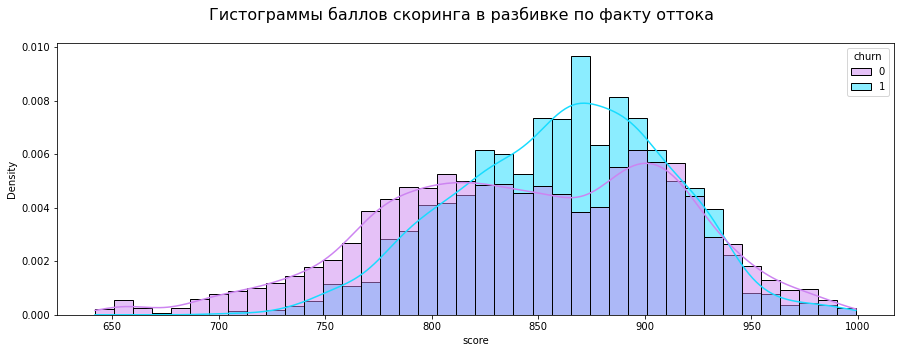

In [99]:
plt.figure(figsize=(15, 5))\
.suptitle('Гистограммы баллов скоринга в разбивке по факту оттока', fontsize=16)

sns.histplot(data=df_bank, kde=True, x='score', hue='churn', common_norm = False, stat ='density',
             palette=['#cd84f1', '#18dcff'])
plt.show()

По гистограмме баланса в разбивке по оттоку видно, что оба значения распределены нормально со скосом вправо. Это значит, что среднее обеих совокупностей будет стремится в правую часть за счет длинного хвоста, расположенного справа, и будет больше медианы. 

Проверим выбросы для баланса для отточных и оставшихся клиентов 

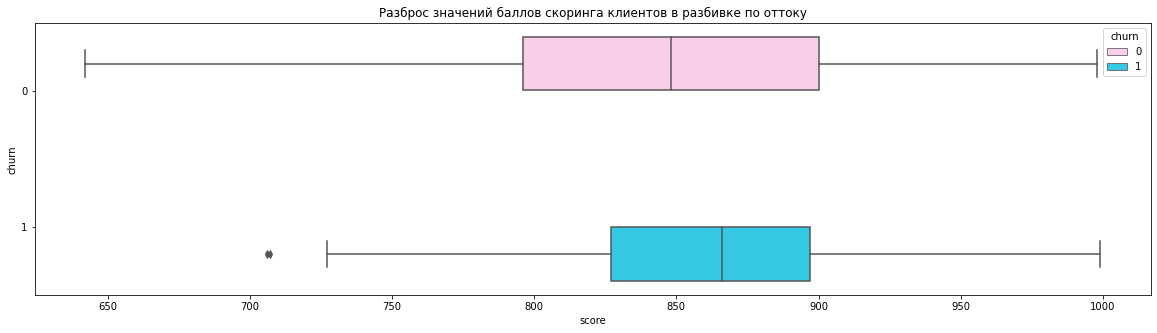

In [100]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_bank, x=df_bank['score'], y=df_bank['churn'], orient='h', hue='churn', 
            palette=['#FFC7EA', '#18dcff'])
plt.title('Разброс значений баллов скоринга клиентов в разбивке по оттоку')
plt.show()

Из боксплотов видно, что в отточных клиентах есть выброс слева, а также что вцелом у них значения смещены в большую сторону и имют меньший диапозон значений. 

Поскольку распределение обеих выборов у нас стремится к нормальному и в одной из выброк есть выброс, то для сравнения баллов скоринга между отточными и оставшимися клиента применим два теста - Т-критерий Стьюдента, который применяется для независимых выборок из совокупностей с нормальным распределением, и тест Манна-Уитни, который чувствителен к выбросам за счет ранжирования значений в выборке 

Поскольку раземеры наших выборок не равны, то при T-тесте Стьюедента укажем явный параметр, что считать дисперсии выборок неравными 

In [101]:
print('p-value по Т-тесту Стьюдента:', 
      format(st.ttest_ind(df_bank.loc[(df_bank['churn']==1)]['score'],
                   df_bank.loc[(df_bank['churn']==0)]['score'],
                  equal_var=False).pvalue, '.40%'))

p-value по Т-тесту Стьюдента: 0.0000000000000000000000000000001815379982%


In [102]:
# в функцию для подсчета p-value передадим два набора с балансом для отточных и оставшихся клиентов 
# выведем p-value 
print('p-value по Манну_Уитни:', 
      format(st.mannwhitneyu(df_bank.loc[(df_bank['churn']==1)]['score'],
                      df_bank.loc[(df_bank['churn']==0)]['score'])[1], '.40%'))

p-value по Манну_Уитни: 0.0000000000000000277144496031439492558233%


Полученное значение p-value по результатам обоих тестов настолько мало (е-33 и е-19), что какой бы критический уровень значимости мы не выбрали - 5% или 1% - полученное значение будет значительно меньше. Значит вероятность получить случайно такое различие в выбоках при верной нулевой гипотезе очень мала и мы должны отвергнуть нулевую гипотезу о равенстве баллов скоринга между отточными и оставшимися клиентами. Значит при исследовании сегментов мы можем попробовать найти такие значения баллов сокринга, при котором есть высокий уровень оттока. Судя по гистограмме эти значения лежат в области медианы отточных клиентов около 870 баллов 

### Определение, склонны ли к уходу неактивные клиенты 

Признак активности клиентов - это бинарный категориальный признак. На предыдущих шагах исследования при построении гистограмм по уровню оттока мы установили, что активные клиенты более склонны к оттоку 

In [103]:
print('Процент оттока активных клиентов:', format(df_bank.loc[df_bank['last_activity'] == 1, 'churn'].mean(), '.0%'))
print('Процент оттока неактивных клиентов:', format(df_bank.loc[df_bank['last_activity'] == 0, 'churn'].mean(), '.0%'))

Процент оттока активных клиентов: 24%
Процент оттока неактивных клиентов: 11%


### Определение склонны ли к уходу клиенты, у которых мало банковских продуктов

Эта гипотеза также была проверена в рамках исследования категориальных переменных - у нас ограниченное количество значений, поэтому ручная проверка оптимальное решение. Было уставновлено что клиенты с более чем 2 продуктами склонны к оттоку


In [104]:
print('Процент оттока клиентов с 1 продуктом:', format(df_bank.loc[df_bank['products'] == 1, 'churn'].mean(), '.0%'))
print('Процент оттока неактивных с 2 продуктами:', format(df_bank.loc[df_bank['products'] == 2, 'churn'].mean(), '.0%'))
print('Процент оттока неактивных с 3 продутками:', format(df_bank.loc[df_bank['products'] == 3, 'churn'].mean(), '.0%'))
print('Процент оттока неактивных с 4 продутками:', format(df_bank.loc[df_bank['products'] == 4, 'churn'].mean(), '.0%'))
print('Процент оттока неактивных с 5 продутками:', format(df_bank.loc[df_bank['products'] == 5, 'churn'].mean(), '.0%'))

Процент оттока клиентов с 1 продуктом: 7%
Процент оттока неактивных с 2 продуктами: 19%
Процент оттока неактивных с 3 продутками: 28%
Процент оттока неактивных с 4 продутками: 62%
Процент оттока неактивных с 5 продутками: 39%


### Проверка зависимости между наличием кредитной карты и вероятностью ухода клиента 

Признак наличия кредитной карты - это бинарный категориальный признак. На предыдущих шагах исследования при построении гистограмм по уровню оттока мы установили, что клиенты без кредитной карты более склонны к оттоку 

In [105]:
print('Процент оттока клиентов с кредитной картой:', 
      format(df_bank.loc[df_bank['credit_card'] == 1, 'churn'].mean(), '.0%'))
print('Процент оттока клиентов без кредитной карты:', 
      format(df_bank.loc[df_bank['credit_card'] == 0, 'churn'].mean(), '.0%'))

Процент оттока клиентов с кредитной картой: 14%
Процент оттока клиентов без кредитной карты: 25%


### Определить склонны ли к уходу клиенты определенных возрастных групп 

У нас ограниченное число возрастов, поэтому склонность к оттоку по возрастам лучше всего определяет по барплоту с процентом оттока, которую мы рисовали ранее.  

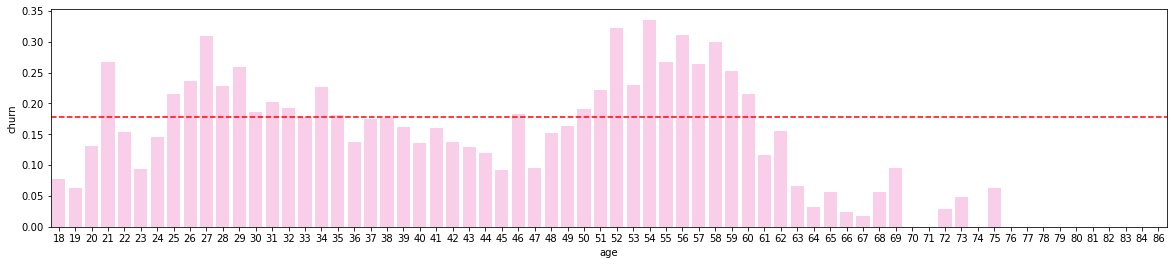

In [106]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_bank.groupby('age').agg({'churn':'mean'}).reset_index(),
           y='churn',
           x='age', palette=['#FFC7EA']) 
plt.axhline(y=0.178, color='red', linestyle='--')

plt.show()

Повторим вывод - наиболее склонны к оттоку клиенты в 21 год, с промежуток с 25 до 29 и с 50 до 60 лет

## Сегментация клиентов

На основании проведенного анализа попробуем выделить сегменты

По результатам кластеризации лучше всего в плане высокого процента оттока показали себя:
- мужчины из Рыбинска и Ярославля, дополнительные признаки - активные, без кредитных карт, продукты больше 3, и можно проверить баллы скоринга больше 80. Возраст в этой категории не сильно выделялся 
- клиенты только из Ростова, дополнительные признаки - активные, без кредитной карты, баллы собственнсти больше 4, продукты меньше 5, скоринг больше 880 и возраст от 26 до 42 и с 48 до 59

Также еще раз укажем данные по общему исследованию: 
- очки скоринга примерно с 830 до 920 
- возраст с 25 примерно до 35 и с 50 до 60 
- оценка недвижимости. Нам интересны интервалы значений от 3 баллов 
    - с 6 до 9 - несмотря на то, что там маленькое число клиентов - около 250 - это отдельный пласт с очень высоким процентом оттока. Возможно будем объединять этот интервал с близлежащим 
    - 4 и 5 имеют высокий процент оттока (24 и 29) и по 1800 клиентов. Их можно рассматривать как по отдельности, так и вместе 
    - 3 имеет самый маленький процент оттока (20) и 1 500 клиентов. Имеет смысл либо не рассматривать его, либо присоединять к 4 и 5 
- количество продуктов - от 2 
    - с 2 продуктами не сильно отличаются от среднего оттока - на 1 процент, но у них самое большое количество клиентов, поэтому не стоит ограничивать по 2 продуктам когда будем смотреть сочетания параметров 
    - 3, 4 и 5 стоит рассматривать как один интервал, потому что в сумме у них около 1 500 клиентов 
- гендер - имеет смысл рассматривать только мужчин, как наиболее склонных к оттоку 
- крединая карта - выделяем клиентов без кредитной карты 
- активность - выделяем активных клиентов 
    

In [107]:
df_bank.head(1)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_ths,est_salary_ths,gender__Ж,gender__М,city__Ростов,city__Рыбинск,city__Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,59.21482,75.71914,1,0,0,1,0


Попробуем выявить сегменты эмпирическим методом исходя их выделенных показателей. По мере формирования удачных сегментов будем добавлять их в словарь `dict_seg`, который потом преобразуем в датасет

In [108]:
df_segments = pd.DataFrame()
dict_seg = {}

In [109]:
seq1 = df_bank.loc[((df_bank['gender'] == "М") &
                    (df_bank['equity'] >= 2) & 
                   (df_bank['age'] >= 50) & (df_bank['age'] <= 60))]

print(seq1.shape[0])
print(seq1['churn'].mean())

527
0.44212523719165087


In [110]:
dict_seg['seg1'] = pd.Series([seq1.shape[0], 
                              seq1['churn'].mean(), 
                              'gender = M and equity >=2 and age >=50 and age <= 60'], 
                             index = ['client_cnt', 'churn', 'description'])

In [111]:
seq2 = df_bank.loc[((df_bank['gender'] == "М") &
                    (df_bank['products'] >= 2) & 
                   (df_bank['age'] >= 24) & (df_bank['age'] <= 36))]

print(seq2.shape[0])
print(seq2['churn'].mean())

1270
0.32755905511811023


In [112]:
dict_seg['seg2'] = pd.Series([seq2.shape[0], 
                              seq2['churn'].mean(), 
                              'gender = M and products >=2 and age >=24 and age <= 36'], 
                             index = ['client_cnt', 'churn', 'description'])

In [113]:
seq3 = df_bank.loc[((df_bank['last_activity'] == 1) &
                    (df_bank['products'] >= 2) & 
                   (df_bank['age'] >= 25) & (df_bank['age'] <= 35))]

print(seq3.shape[0])
print(seq3['churn'].mean())

1070
0.4102803738317757


In [114]:
dict_seg['seg3'] = pd.Series([seq3.shape[0], 
                              seq3['churn'].mean(), 
                              'last_activity = 1 and products >=2 and age >=25 and age <= 35'], 
                             index = ['client_cnt', 'churn', 'description'])

In [115]:
seq4 = df_bank.loc[((df_bank['gender'] == "М") &
                    (df_bank['city'].isin(['Рыбинск','Ярославль'])) & 
                   (df_bank['credit_card'] == 0))]

print(seq4.shape[0])
print(seq4['churn'].mean())

1019
0.35328753680078506


In [116]:
dict_seg['seg4'] = pd.Series([seq4.shape[0], 
                              seq4['churn'].mean(), 
                              'gender = M and city in (Рыбинск,Ярославль) and credit_card = 0'], 
                             index = ['client_cnt', 'churn', 'description'])

In [117]:
seq5 = df_bank.loc[(df_bank['city'].isin(['Ростов']) & (df_bank['score'] > 820))]

print(seq5.shape[0])
print(seq5['churn'].mean())

883
0.22310305775764439


In [118]:
dict_seg['seg5'] = pd.Series([seq5.shape[0], 
                              seq5['churn'].mean(), 
                              'city in (Ростов) and score > 820'], 
                             index = ['client_cnt', 'churn', 'description'])

In [119]:
seq6 = df_bank.loc[(df_bank['city'].isin(['Ростов']) & (df_bank['age'] > 25))]

print(seq6.shape[0])
print(seq6['churn'].mean())

1355
0.18892988929889298


In [120]:
dict_seg['seg6'] = pd.Series([seq6.shape[0], 
                              seq6['churn'].mean(), 
                              'city in (Ростов) and age > 25'], 
                             index = ['client_cnt', 'churn', 'description'])

Теперь попробуем выделить сегменты, отсекая значения и выводя процент оттока по новому усеченном датасету. Ранее мы выявили, что оценка собственности больше 4 баллов имеет большое число клиентов и высокий отток. Применив это уловие посмотрим какой из возрастов покажет больший отток 

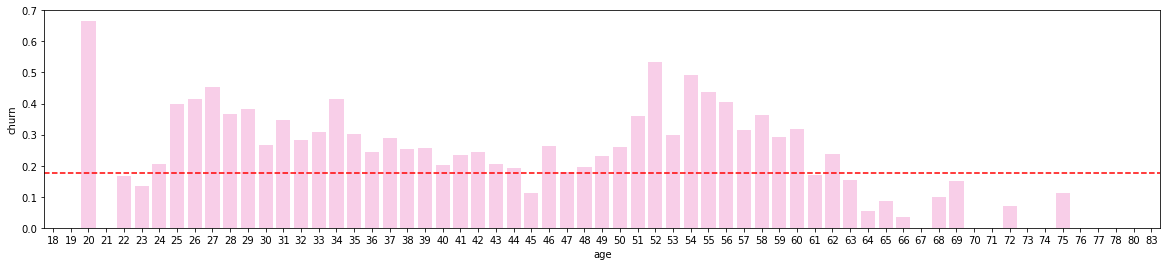

In [121]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df_bank.query('equity >=4').groupby('age').agg({'churn':'mean'}).reset_index(),
           y='churn',
           x='age', palette=['#FFC7EA']) 
plt.axhline(y=0.178, color='red', linestyle='--')

plt.show()

Получили высокий отток с 25 до 29 лет и с 49 до 60. Посмотрим какие признаки будут значимыми после усечения по возрасту и попробуем их скомбинировать 

Сначала посмотри с 25 до 29 лет

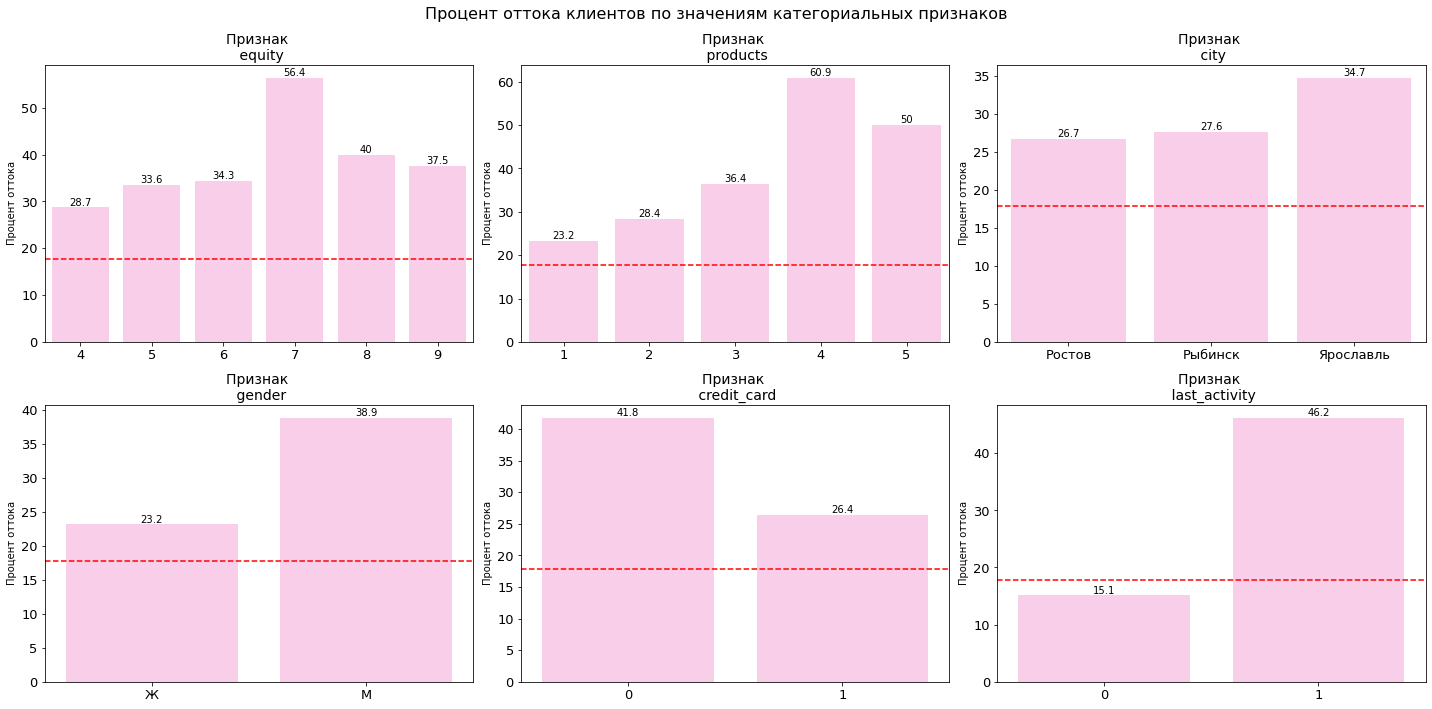

In [122]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row)).suptitle('Процент оттока клиентов по значениям категориальных признаков', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.query('equity >=4 and age >=25 and age <=39')\
                      .groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(),
           y='churn',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.axhline(y=17.8, color='red', linestyle='--')
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

In [123]:
seq7 = df_bank.loc[((df_bank['equity'] >= 4) 
                    & (df_bank['age'] >= 25) & (df_bank['age'] <= 39)
                   & (df_bank['city'] == 'Ярославль'))]

print(seq7.shape[0])
print(seq7['churn'].mean())

1129
0.34720992028343667


In [124]:
dict_seg['seg7'] = pd.Series([seq7.shape[0], 
                              seq7['churn'].mean(), 
                              'equity >=4 and age >=25 and age <=39 and city = Ярославль'], 
                             index = ['client_cnt', 'churn', 'description'])

In [125]:
seq8 = df_bank.loc[((df_bank['equity'] >= 4) 
                    & (df_bank['age'] >= 25) & (df_bank['age'] <= 39)
                   & (df_bank['last_activity'] == 1))]

print(seq8.shape[0])
print(seq8['churn'].mean())

992
0.46169354838709675


In [126]:
dict_seg['seg8'] = pd.Series([seq8.shape[0], 
                              seq8['churn'].mean(), 
                              'equity >=4 and age >=25 and age <=39 and last_activity = 1'], 
                             index = ['client_cnt', 'churn', 'description'])

In [127]:
seq9 = df_bank.loc[((df_bank['equity'] >= 4) 
                    & (df_bank['age'] >= 25) & (df_bank['age'] <= 39)
                   & (df_bank['credit_card'] == 0))]

print(seq9.shape[0])
print(seq9['churn'].mean())

651
0.41781874039938555


In [128]:
dict_seg['seg9'] = pd.Series([seq9.shape[0], 
                              seq9['churn'].mean(), 
                              'equity >=4 and age >=25 and age <=39 and credit_card = 0'], 
                             index = ['client_cnt', 'churn', 'description'])

Теперь посмотрим с 49 до 60

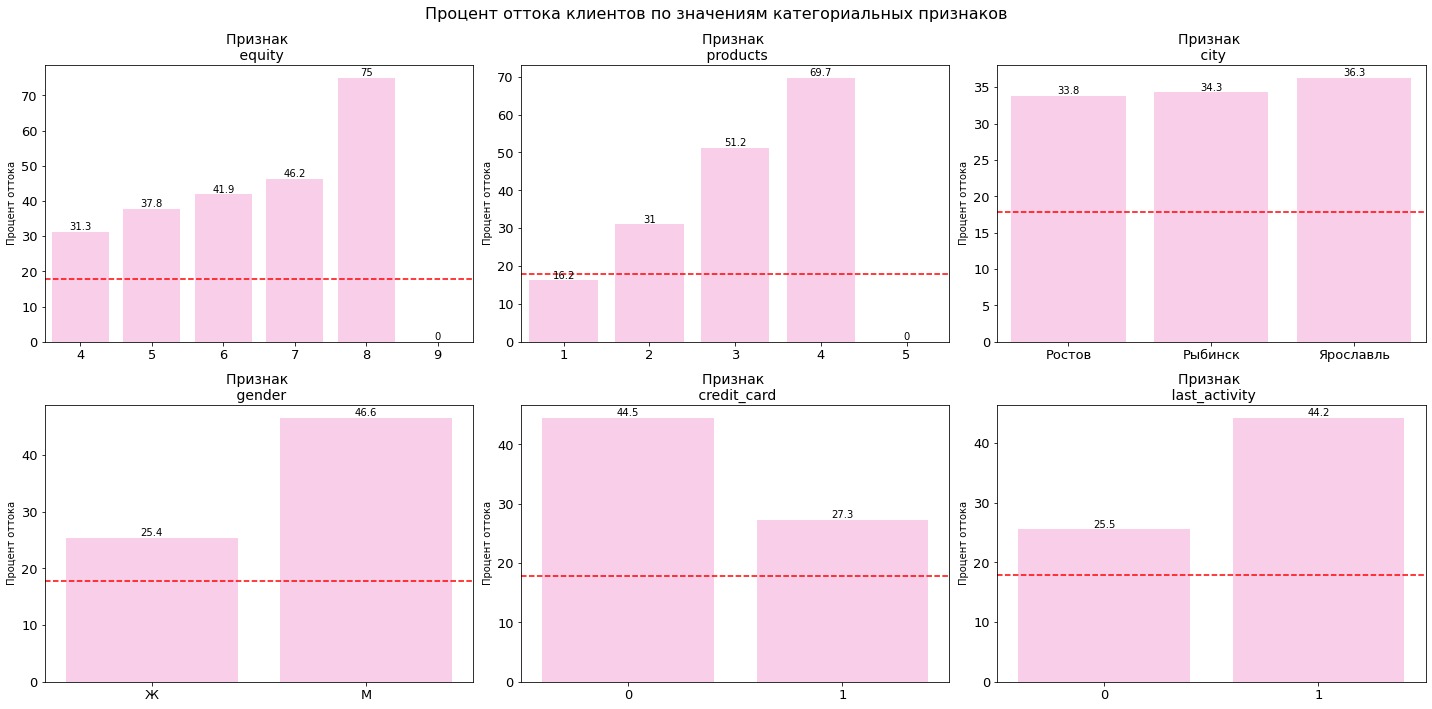

In [129]:
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(cat_ord_param_list + cat_param_list)/3)

plt.figure(figsize=(20, 5 * count_plt_row)).suptitle('Процент оттока клиентов по значениям категориальных признаков', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(cat_ord_param_list + cat_param_list):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    ax1 = sns.barplot(data=df_bank.query('equity >=4 and age >=49 & age <=60')\
                      .groupby(i).agg({'churn':'mean'}).mul(100).round(1).reset_index(),
           y='churn',
           x=i, palette=['#FFC7EA'])
    
    # устанавливаем подписи на бары 
    for container in ax1.containers:
        ax1.bar_label(container)
    
    plt.title('Признак \n {}'.format(i), fontsize=14, pad=5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.axhline(y=17.8, color='red', linestyle='--')
    plt.xlabel(None)
    plt.ylabel('Процент оттока')

plt.tight_layout(w_pad=1)
plt.subplots_adjust(top=0.9) 
plt.show()

In [130]:
seq10 = df_bank.loc[((df_bank['equity'] >= 4) 
                    & (df_bank['age'] >= 49) & (df_bank['age'] <= 60)
                   & (df_bank['products'] >=2))]

print(seq10.shape[0])
print(seq10['churn'].mean())

696
0.38362068965517243


In [131]:
dict_seg['seg10'] = pd.Series([seq10.shape[0], 
                              seq10['churn'].mean(), 
                              'equity >=4 and age >=49 and age <=60 and products >=2'], 
                             index = ['client_cnt', 'churn', 'description'])

Выделили 10 сегментов. Сохраним их в отдельный датасет и приоритезируем 

In [132]:
df_segments = pd.DataFrame(dict_seg) 
df_segments = df_segments.T
#df_segments

In [133]:
df_segments['client_churn_cnt'] = df_segments['client_cnt'] * df_segments['churn']
df_segments = df_segments.reset_index().sort_values(by='churn',ascending=False)

Присвоим приоритеты сенмента исходя из процента оттока и количества клиентов, которых мы теряем в этом сегменте 

In [134]:
df_segments.loc[(df_segments['index'] == 'seg1'),'priority'] = 9
df_segments.loc[(df_segments['index'] == 'seg2'),'priority'] = 3
df_segments.loc[(df_segments['index'] == 'seg3'),'priority'] = 2
df_segments.loc[(df_segments['index'] == 'seg4'),'priority'] = 5
df_segments.loc[(df_segments['index'] == 'seg5'),'priority'] = 10
df_segments.loc[(df_segments['index'] == 'seg6'),'priority'] = 8
df_segments.loc[(df_segments['index'] == 'seg7'),'priority'] = 4
df_segments.loc[(df_segments['index'] == 'seg8'),'priority'] = 1
df_segments.loc[(df_segments['index'] == 'seg9'),'priority'] = 6
df_segments.loc[(df_segments['index'] == 'seg10'),'priority'] = 7

Перед построением графиков по сегментам проверим типы данных и добавим нужные столбцы

In [135]:
df_segments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10 non-null     object 
 1   client_cnt        10 non-null     object 
 2   churn             10 non-null     object 
 3   description       10 non-null     object 
 4   client_churn_cnt  10 non-null     object 
 5   priority          10 non-null     float64
dtypes: float64(1), object(5)
memory usage: 560.0+ bytes


In [136]:
df_segments['churn'] = df_segments['churn'].astype('float')
df_segments['client_cnt'] = df_segments['client_cnt'].astype('int')


df_segments['client_no_churn_cnt'] = df_segments['client_cnt'] - df_segments['client_churn_cnt']
df_segments['client_no_churn_cnt'] = df_segments['client_no_churn_cnt'].astype('int')
df_segments['client_churn_cnt'] = df_segments['client_churn_cnt'].astype('int')

df_segments['churn_percent'] = np.round(df_segments['churn']*100, decimals=2)

In [137]:
df_segments.sort_values(by='priority',ascending=True)

,index,client_cnt,churn,description,client_churn_cnt,priority,client_no_churn_cnt,churn_percent
7,seg8,992,0.461694,equity >=4 and age >=25 and age <=39 and last_activity = 1,458,1.0,534,46.17
2,seg3,1070,0.410280,last_activity = 1 and products >=2 and age >=25 and age <= 35,439,2.0,631,41.03
1,seg2,1270,0.327559,gender = M and products >=2 and age >=24 and age <= 36,416,3.0,854,32.76
6,seg7,1129,0.347210,equity >=4 and age >=25 and age <=39 and city = Ярославль,392,4.0,737,34.72
3,seg4,1019,0.353288,"gender = M and city in (Рыбинск,Ярославль) and credit_card = 0",360,5.0,659,35.33
8,seg9,651,0.417819,equity >=4 and age >=25 and age <=39 and credit_card = 0,272,6.0,379,41.78
9,seg10,696,0.383621,equity >=4 and age >=49 and age <=60 and products >=2,267,7.0,429,38.36
5,seg6,1355,0.188930,city in (Ростов) and age > 25,256,8.0,1099,18.89
0,seg1,527,0.442125,gender = M and equity >=2 and age >=50 and age <= 60,233,9.0,294,44.21
4,seg5,883,0.223103,city in (Ростов) and score > 820,197,10.0,686,22.31


Построим круговые графики с соотношением размеров общего числа клиентов, числа ушедших клиентов и процента отточных клиентов 

In [138]:
# функция для подсчета абсолютного значения для секции круговой диаграммы
def absolute_signature(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute:d}"

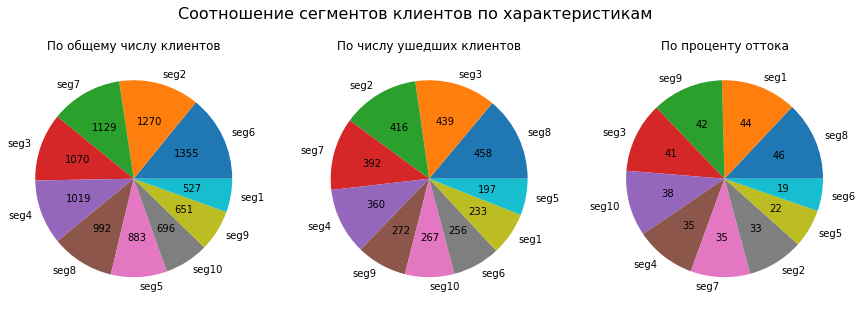

In [139]:
list_pie = ['client_cnt', 'client_churn_cnt', 'churn_percent']
# подсчитаем количество строк для построения общего графика
# на одной строке будет размещего по 3 графика 
count_plt_row = math.ceil(len(list_pie)/3)

plt.figure(figsize=(15, 5 * count_plt_row)).suptitle('Соотношение сегментов клиентов по характеристикам', 
                                                     fontsize=16)

# перебираем элементы списка  и для каждого считаем отдельный барплот 
for counter, i in enumerate(list_pie):
        
    ax = plt.subplot(count_plt_row, 3, counter+1)
    
    df = df_segments.groupby('index').agg({i:'sum'})\
           .sort_values(by=i, ascending=False)
    df.plot(y=i, 
             autopct=lambda pct: absolute_signature(pct, df[i]),
             kind='pie',
             legend=False, 
             ax=ax)
    if (i == 'client_cnt'): plt.title("По общему числу клиентов")
    if (i == 'client_churn_cnt'): plt.title("По числу ушедших клиентов")
    if (i == 'churn_percent'): plt.title("По проценту оттока")
    plt.ylabel(None)

plt.show()

Построим график, проранжированный по размеру сегментов с отражением количества отточных клиентов

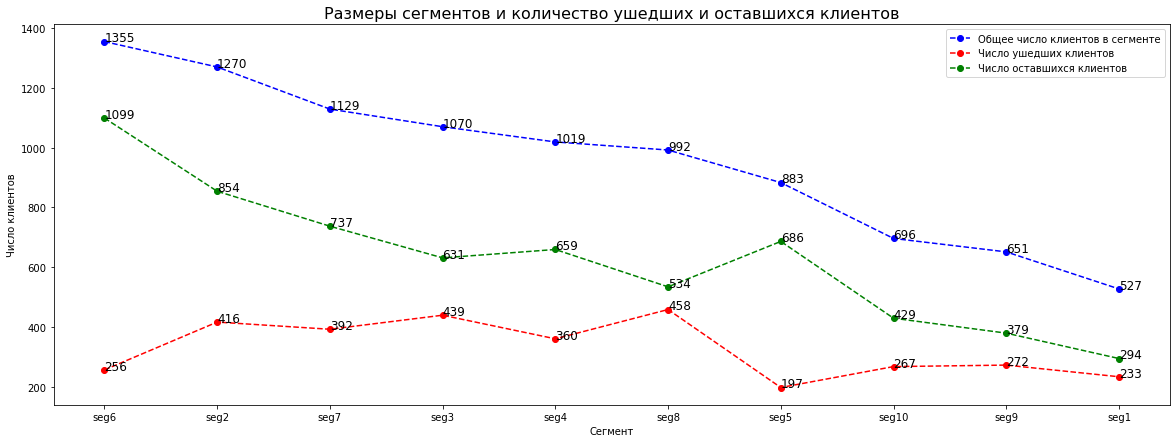

In [140]:
plt.figure(figsize=(20, 7))
x = df_segments.sort_values(by='client_cnt',ascending=False)['index']
y = df_segments.sort_values(by='client_cnt',ascending=False)['client_cnt']
y2 = df_segments.sort_values(by='client_cnt',ascending=False)['client_churn_cnt']
y3 = df_segments.sort_values(by='client_cnt',ascending=False)['client_no_churn_cnt']

plt.plot(x,y,'--b', marker='o', label='Общее число клиентов в сегменте')
for i in range(len(df_segments['index'].values)):
    plt.text(df_segments['index'].values[i],
             df_segments['client_cnt'].values[i],
             df_segments['client_cnt'].values[i], 
             fontsize=12)

plt.plot(x,y2,'--r', marker='o', label='Число ушедших клиентов')
for i in range(len(df_segments['index'].values)):
    plt.text(df_segments['index'].values[i],
             df_segments['client_churn_cnt'].values[i],
             df_segments['client_churn_cnt'].values[i], 
             fontsize=12)
    
plt.plot(x,y3,'--g', marker='o', label='Число оставшихся клиентов')
for i in range(len(df_segments['index'].values)):
    plt.text(df_segments['index'].values[i],
             df_segments['client_no_churn_cnt'].values[i],
             df_segments['client_no_churn_cnt'].values[i], 
             fontsize=12)

plt.title('Размеры сегментов и количество ушедших и оставшихся клиентов', fontsize=16)
plt.xlabel('Сегмент')
plt.ylabel('Число клиентов')
plt.legend()
plt.show()

Отобразим таблицу с сегментами в формате для презентации 

In [141]:
df_segments.head(1)

,index,client_cnt,churn,description,client_churn_cnt,priority,client_no_churn_cnt,churn_percent
7,seg8,992,0.461694,equity >=4 and age >=25 and age <=39 and last_activity = 1,458,1.0,534,46.17


In [142]:
df_segments.groupby('index').agg({'client_cnt': 'first',
                                  'churn_percent': 'first',
                                  'client_churn_cnt':  'first',
                                 'description':'first',
                                 'priority':'first'}).sort_values(by='priority')\
.rename(columns={'client_cnt':'Объем сегмента',
                 'churn_percent': 'Процент оттока',
                 'client_churn_cnt': 'Объем оттока',
                 'description':'Описание сегмента',
                 'priority': 'Приоритет'}).rename(index={'index':'Сегмент'}, level=0)

,Объем сегмента,Процент оттока,Объем оттока,Описание сегмента,Приоритет
index,,,,,
seg8,992,46.17,458,equity >=4 and age >=25 and age <=39 and last_activity = 1,1.0
seg3,1070,41.03,439,last_activity = 1 and products >=2 and age >=25 and age <= 35,2.0
seg2,1270,32.76,416,gender = M and products >=2 and age >=24 and age <= 36,3.0
seg7,1129,34.72,392,equity >=4 and age >=25 and age <=39 and city = Ярославль,4.0
seg4,1019,35.33,360,"gender = M and city in (Рыбинск,Ярославль) and credit_card = 0",5.0
seg9,651,41.78,272,equity >=4 and age >=25 and age <=39 and credit_card = 0,6.0
seg10,696,38.36,267,equity >=4 and age >=49 and age <=60 and products >=2,7.0
seg6,1355,18.89,256,city in (Ростов) and age > 25,8.0
seg1,527,44.21,233,gender = M and equity >=2 and age >=50 and age <= 60,9.0


In [143]:
df_segments.groupby('index').agg({'client_cnt': 'first',
                                  'churn_percent': 'first',
                                  'client_churn_cnt':  'first',
                                 'description':'first',
                                 'priority':'first'}).sort_values(by='priority')\
.rename(columns={'client_cnt':'Объем сегмента',
                 'churn_percent': 'Процент оттока',
                 'client_churn_cnt': 'Объем оттока',
                 'description':'Описание сегмента',
                 'priority': 'Приоритет'}).rename(index={'seg1': 'Сегмент 1', 
                                                         'seg2': 'Сегмент 2', 
                                                         'seg3': 'Сегмент 3',
                                                        'seg4': 'Сегмент 4', 
                                                         'seg5': 'Сегмент 5', 
                                                         'seg6': 'Сегмент 6',
                                                        'seg7': 'Сегмент 7', 
                                                         'seg8': 'Сегмент 8', 
                                                         'seg9': 'Сегмент 9',
                                                         'seg10': 'Сегмент 10'}).rename_axis('Сегмент')

,Объем сегмента,Процент оттока,Объем оттока,Описание сегмента,Приоритет
Сегмент,,,,,
Сегмент 8,992,46.17,458,equity >=4 and age >=25 and age <=39 and last_activity = 1,1.0
Сегмент 3,1070,41.03,439,last_activity = 1 and products >=2 and age >=25 and age <= 35,2.0
Сегмент 2,1270,32.76,416,gender = M and products >=2 and age >=24 and age <= 36,3.0
Сегмент 7,1129,34.72,392,equity >=4 and age >=25 and age <=39 and city = Ярославль,4.0
Сегмент 4,1019,35.33,360,"gender = M and city in (Рыбинск,Ярославль) and credit_card = 0",5.0
Сегмент 9,651,41.78,272,equity >=4 and age >=25 and age <=39 and credit_card = 0,6.0
Сегмент 10,696,38.36,267,equity >=4 and age >=49 and age <=60 and products >=2,7.0
Сегмент 6,1355,18.89,256,city in (Ростов) and age > 25,8.0
Сегмент 1,527,44.21,233,gender = M and equity >=2 and age >=50 and age <= 60,9.0


## Выводы

В ходе исследования был пронализирован датасет с данными о клиентах банка и признаком оттока. Средний отток по банку - 18,2%.

Были получены следующие общие результаты:
- Датасет содержал примерно 25% пропусков в балансе клиента - это срез был представлен в основном клиентами с 0 оценкой собственности и имеющих 1 продукт. Общее значение оттока для этого среза - 0,5% и ни один из признаков не давал высокого показателя оттока.
- Анализ количественных и качественных признаков по всему датасету показал, что в разрезе отдельных признаков зарплата не имеет значимого влияния на отток, а наиболее склонны к оттоку клиенты со следующими признаками (если рассматривать параметры изолированно друг от друга):
    - очки скоринга примерно с 830 до 920 
    - возраст с 25 примерно до 35 и с 50 до 60 
    - оценка недвижимости - от 3 баллов 
    - количество продуктов - от 2 
    - гендер - мужчины
    - город - показали примерно одинаковый уровень оттока
    - крединая карта - выделяем клиентов без кредитной карты 
    - активность - выделяем активных клиентов 
- По результатам кластеризации лучше всего в плане высокого процента оттока показали себя:
    - мужчины из Рыбинска и Ярославля, дополнительные признаки - активные, без кредитных карт, продукты больше 3, и можно проверить баллы скоринга больше 80. Возраст в этой категории не сильно выделялся 
    - клиенты только из Ростова, дополнительные признаки - активные, без кредитной карты, баллы собственнсти больше 4, продукты меньше 5, скоринг больше 880 и возраст от 26 до 42 и с 48 до 59
- Проверка гипотез подтвердила ранее сделанные предварительные выводы.   

По результатам проведенного анализа были проведены эксперименты по сочетанию различных характеристик клиентов и выявлены 10 сегментов клиентов с оттоком выше среднего по банку - они еще раз представлены в таблице ниже. Таблица приоритезирована согласно рекомендуемому порядку работы с сегментами

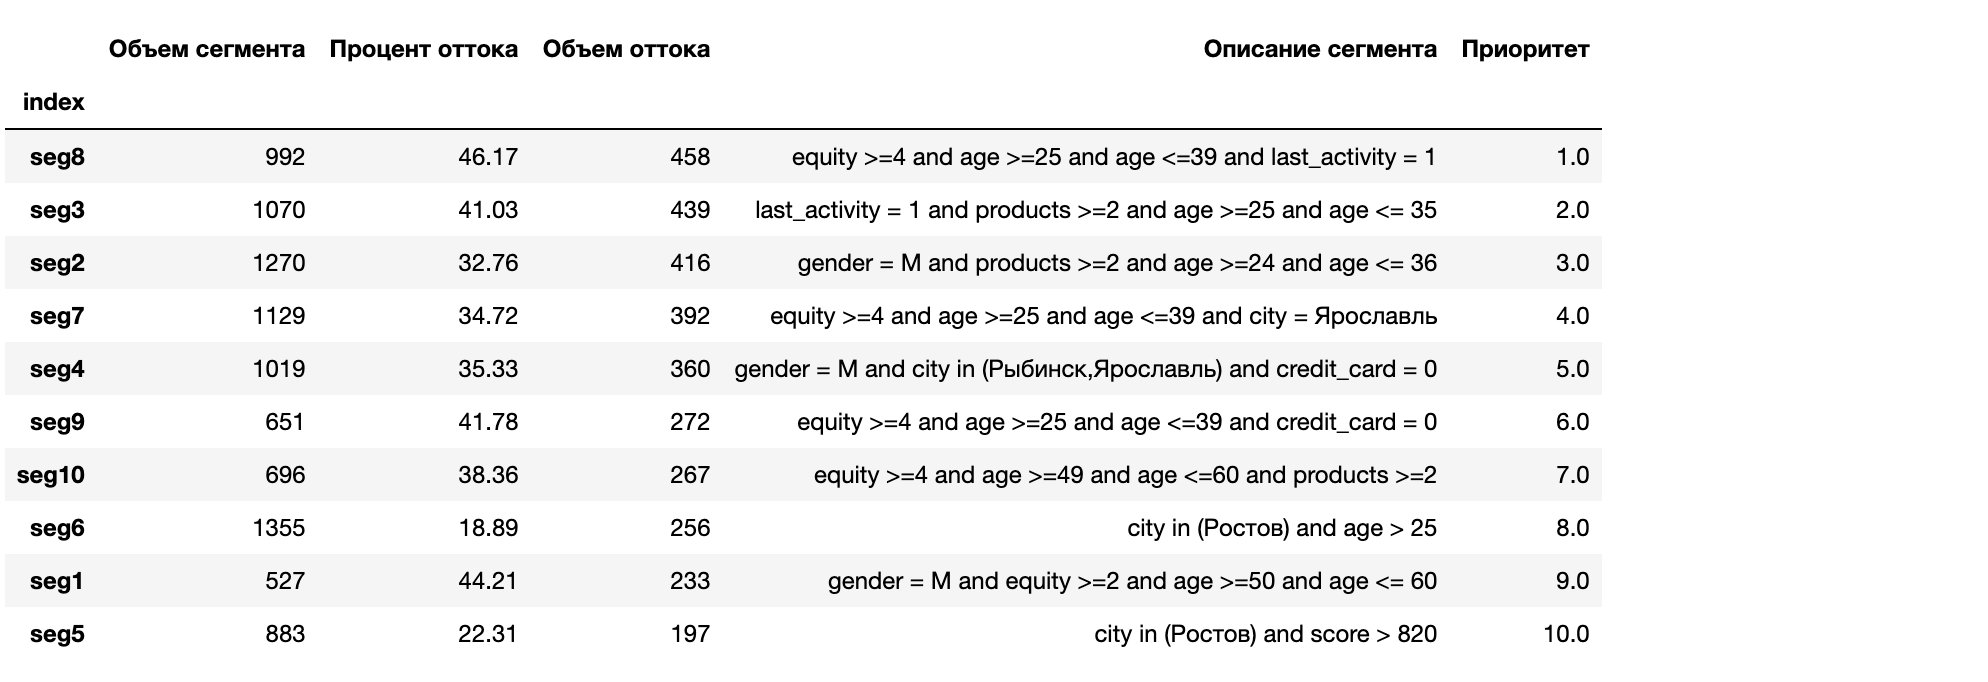
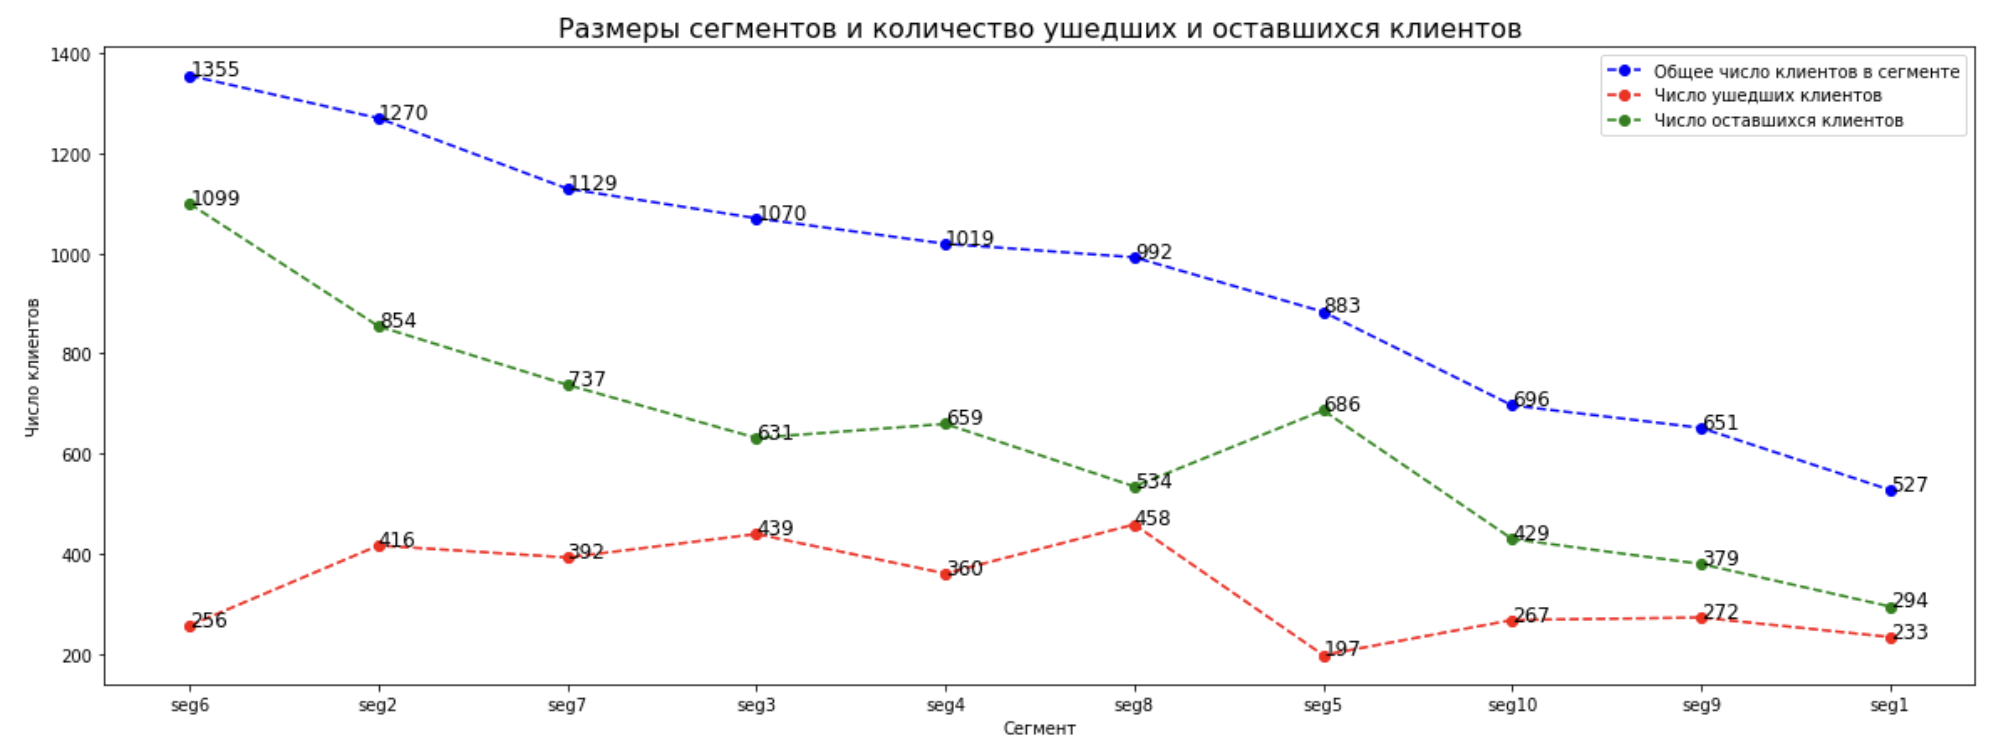

Рекомендации по работе с клиентами для первых топ-3 сегментов:
- seg8 - это клиенты активного возраста с оценкой собственности выше среднего. Рекомендация работать над качеством услуг и современными технологиями по предоставлению сервисов. Также можно предложить выгодные акции по страхованию имущества 
- seg3 - это тоже активные клиенты с продуктами более 2. Рекомендацию предложить более выгодные условия по продуктам банка, повышенную ставку по вкладам, скидки на обслуживанию карт, повышенный кэшбек при оплате картой банка 
- seg2 - мужчины активного возраста с продуктами больше 2. Можно предложить скидки у партнеров - скидки на бензин или автозапчасти, страхование автомобиля или иные выгодные условия с акцентом на гендер

## Ссылка на презентацию 

Ссылка на презентацию - [здесь](https://disk.yandex.ru/d/FFmnELVH94ZIQg)

## Ссылка на дашборд

Дашборд будем строить по тем же предобработаным и очищенным данным, с которыми работали при анализе. Выгрузим их в новый файл 

In [144]:
df_bank.to_csv('df_bank_dash.csv', index = False)

In [145]:
#проверка корректности рассчета графика в табло 
#df_bank.groupby('products').agg({'user_id':'count', 'churn': 'mean'})

Ссылка на дашборд - [здесь](https://public.tableau.com/app/profile/natalia7606/viz/banks_16936532350870/Dashboard1)